1. Read Dataset

In [ ]:

import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# Read the CSV, skipping the header row
df = pd.read_csv('sample_data/heart_disease_uci.csv', skiprows=1, header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'condition']
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


2.Understand key variables linked to heart disease using ploting corelation heatmap

Dataset Shape: (297, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Column descriptions:

age: Age in years
sex: Sex (1 = male; 0 = female)
cp: Chest pain type (0-3)
trestbps: Resting blood pressure
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: E

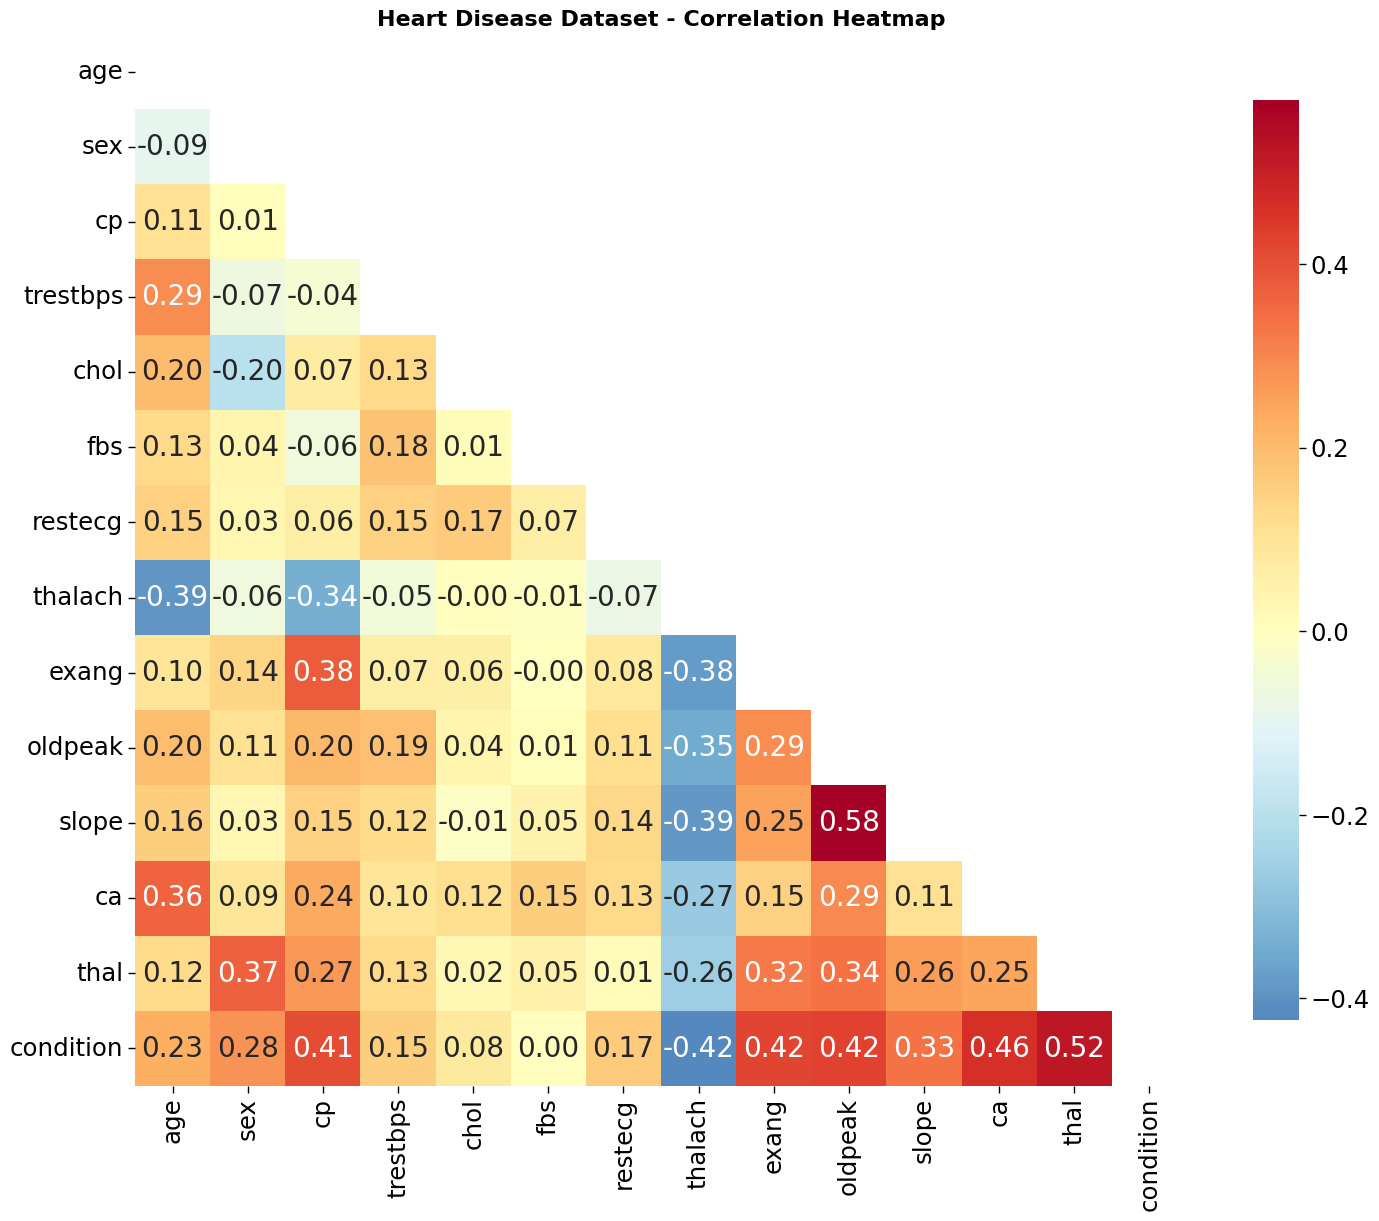


Correlations with Heart Disease (condition) - sorted by absolute value:
condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64


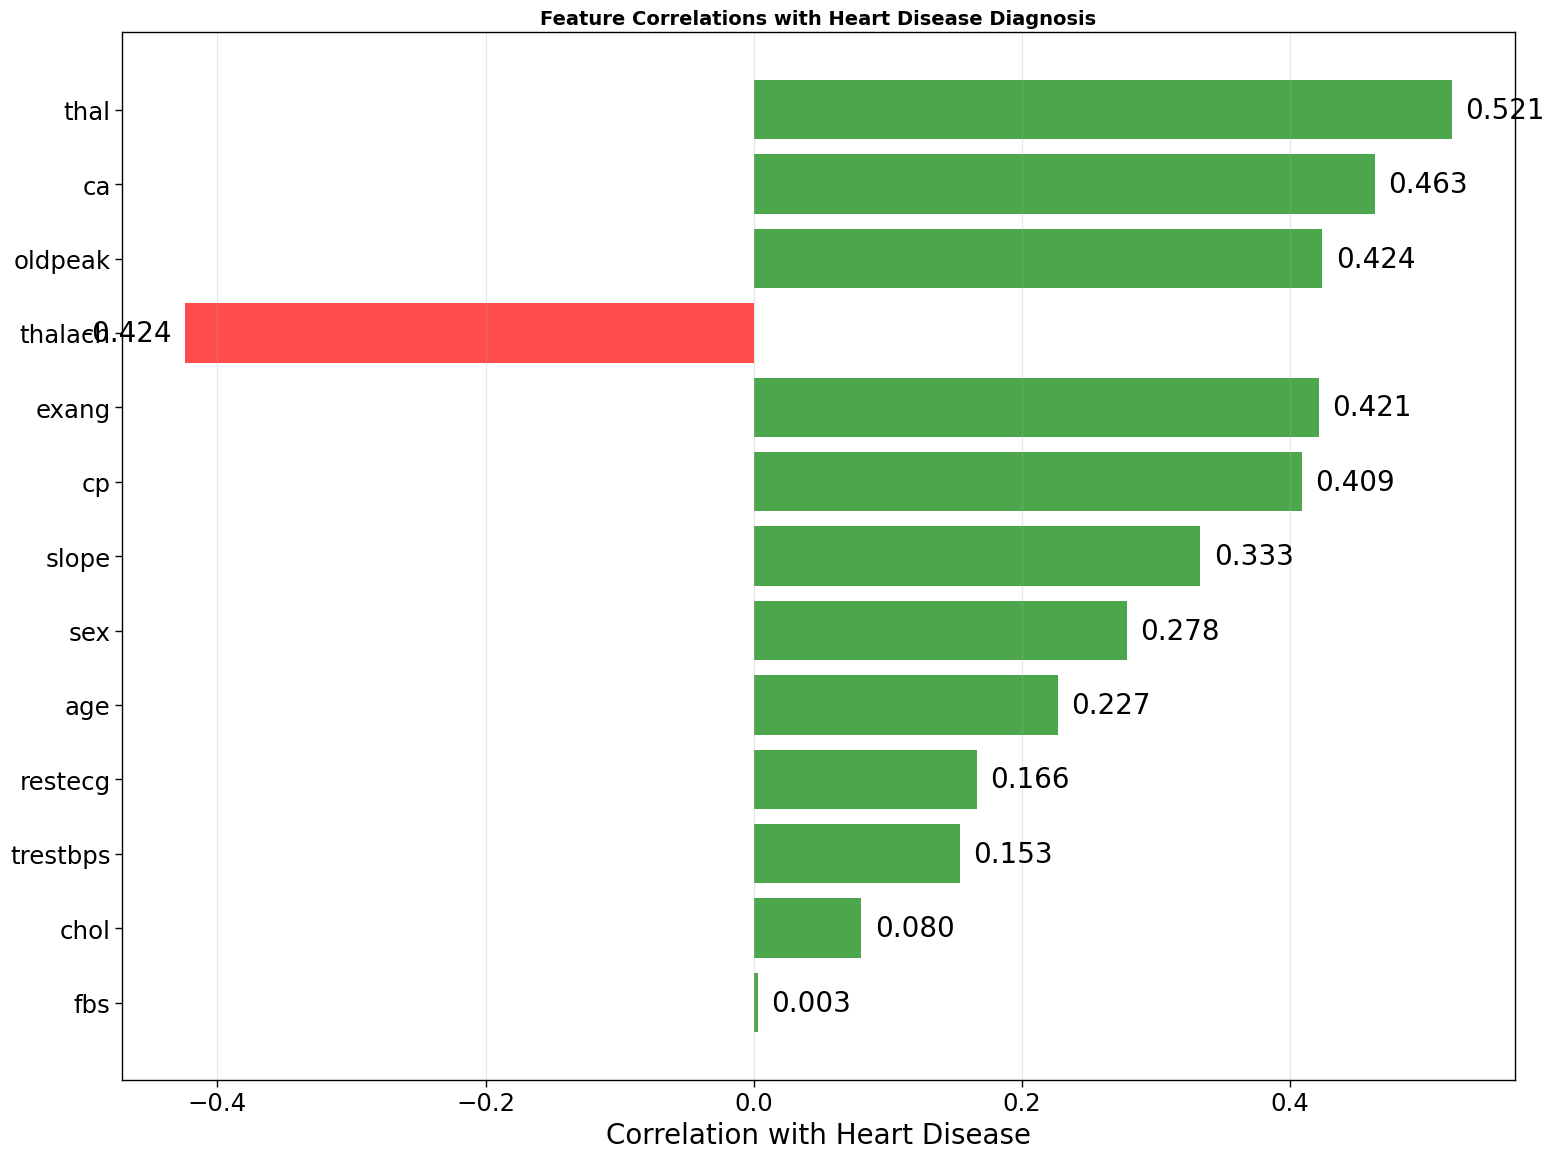

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# Read the CSV, skipping the header row
df = pd.read_csv('sample_data/heart_disease_uci.csv')

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'condition']
# Display information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn descriptions:")
print("""
age: Age in years
sex: Sex (1 = male; 0 = female)
cp: Chest pain type (0-3)
trestbps: Resting blood pressure
chol: Serum cholesterol in mg/dl
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg: Resting electrocardiographic results (0-2)
thalach: Maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise
slope: Slope of peak exercise ST segment (0-2)
ca: Number of major vessels colored by fluoroscopy (0-3)
thal: Thalassemia (0-2)
condition: Heart disease diagnosis (1 = presence; 0 = absence)
""")
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Calculate correlation matrix
correlation_matrix = df.corr()
# Create the correlation heatmap
plt.figure(figsize=(15, 13))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix,
                      mask=mask,
                      annot=True,
                      cmap='RdYlBu_r',
                      center=0,
                      square=True,
                      fmt='.2f',
                      cbar_kws={"shrink": .8})

plt.title('Heart Disease Dataset - Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Focus on correlations with the target variable (condition)
print("\nCorrelations with Heart Disease (condition) - sorted by absolute value:")
target_correlations = correlation_matrix['condition'].abs().sort_values(ascending=False)
print(target_correlations)

# Create a bar plot for target correlations
plt.figure(figsize=(16, 12))
target_corr_df = correlation_matrix['condition'].drop('condition').sort_values(key=abs, ascending=True)
colors = ['red' if x < 0 else 'green' for x in target_corr_df.values]

plt.barh(range(len(target_corr_df)), target_corr_df.values, color=colors, alpha=0.7)
plt.yticks(range(len(target_corr_df)), target_corr_df.index)
plt.xlabel('Correlation with Heart Disease')
plt.title('Feature Correlations with Heart Disease Diagnosis', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, v in enumerate(target_corr_df.values):
    plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
             va='center', ha='left' if v >= 0 else 'right')

plt.tight_layout()
plt.show()

3. Perform some pre-processing steps like normalizing features (or any other relevant preprocessing).

HEART DISEASE DATA PREPROCESSING PIPELINE
Dataset loaded successfully!
Shape: (297, 14)

DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang 

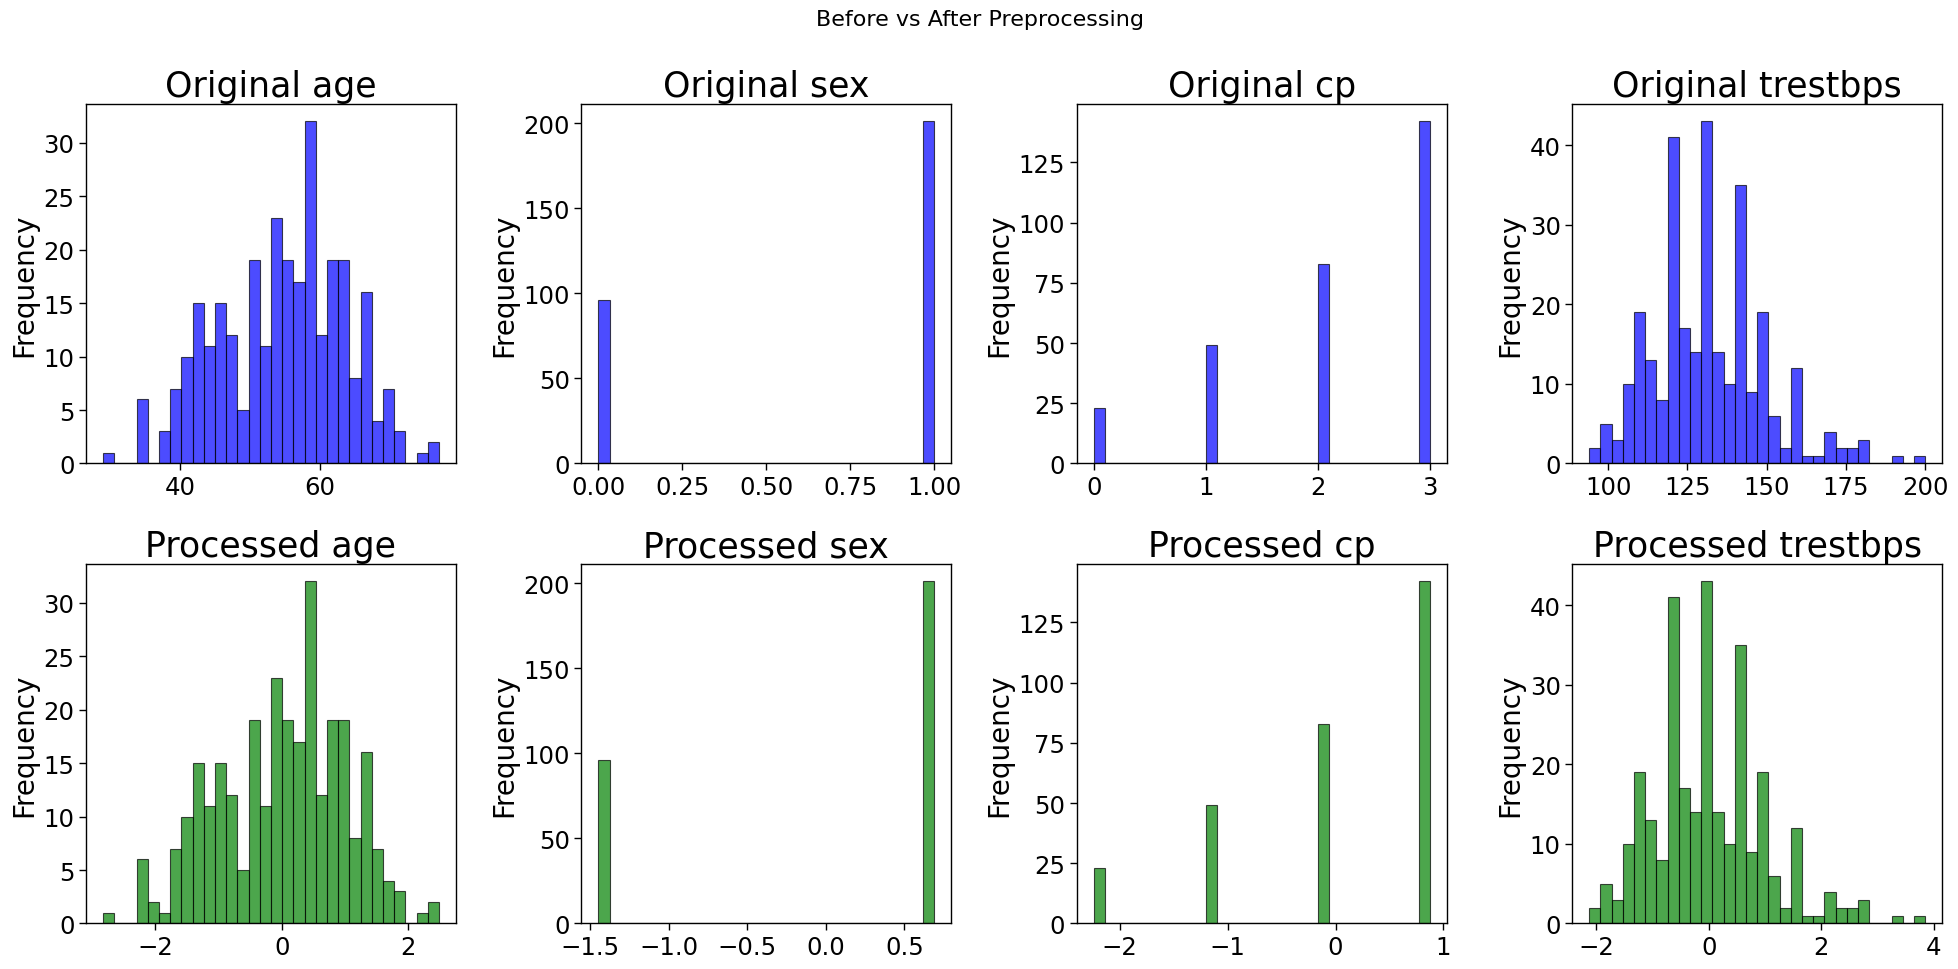

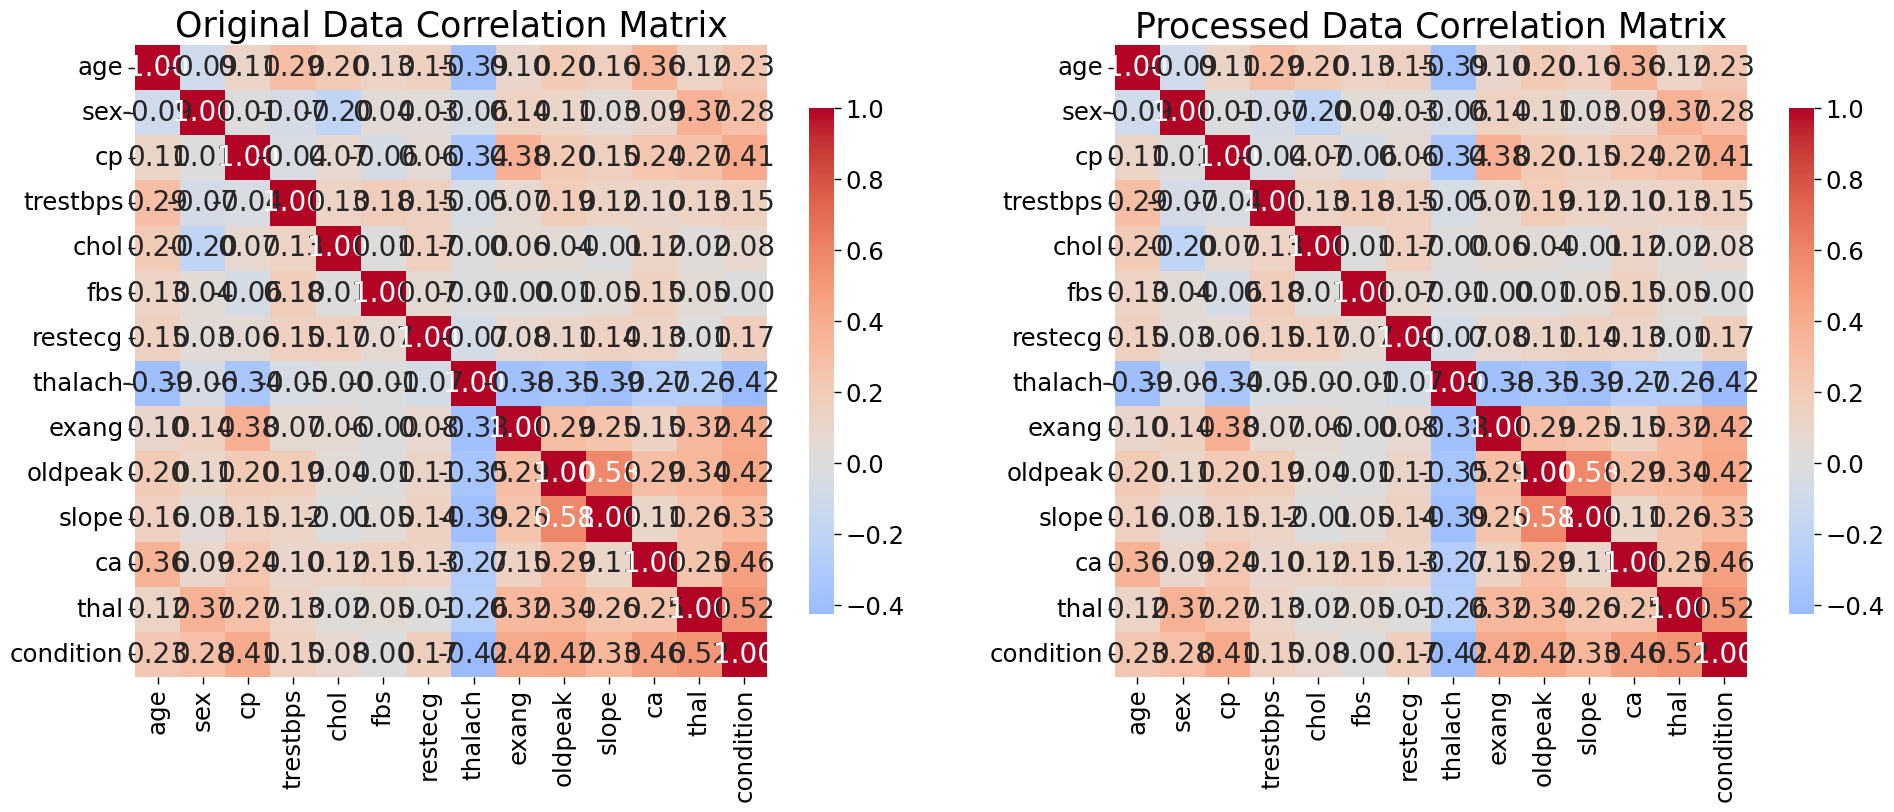


PREPROCESSING SUMMARY
✅ Data loaded: 297 rows, 14 columns
✅ Missing values handled
✅ Duplicates removed
✅ Outliers detected
✅ Features encoded
✅ Features normalized using standard scaling
✅ Final processed data shape: (297, 14)
✅ Processed data saved to: heart_disease_processed_standard.csv

Processed data sample:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419   
2  1.268242 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419   
3  1.157555  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199   
4  1.046868  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  condition  
0 -0.812095 -0.696419 -0.820813  0.643781  0.344824 -0.874292        0.0  
1  0.061157 -0.696419  0.639470 -0.976583  1.411625 -0.874292        0.0  
2 -1.55

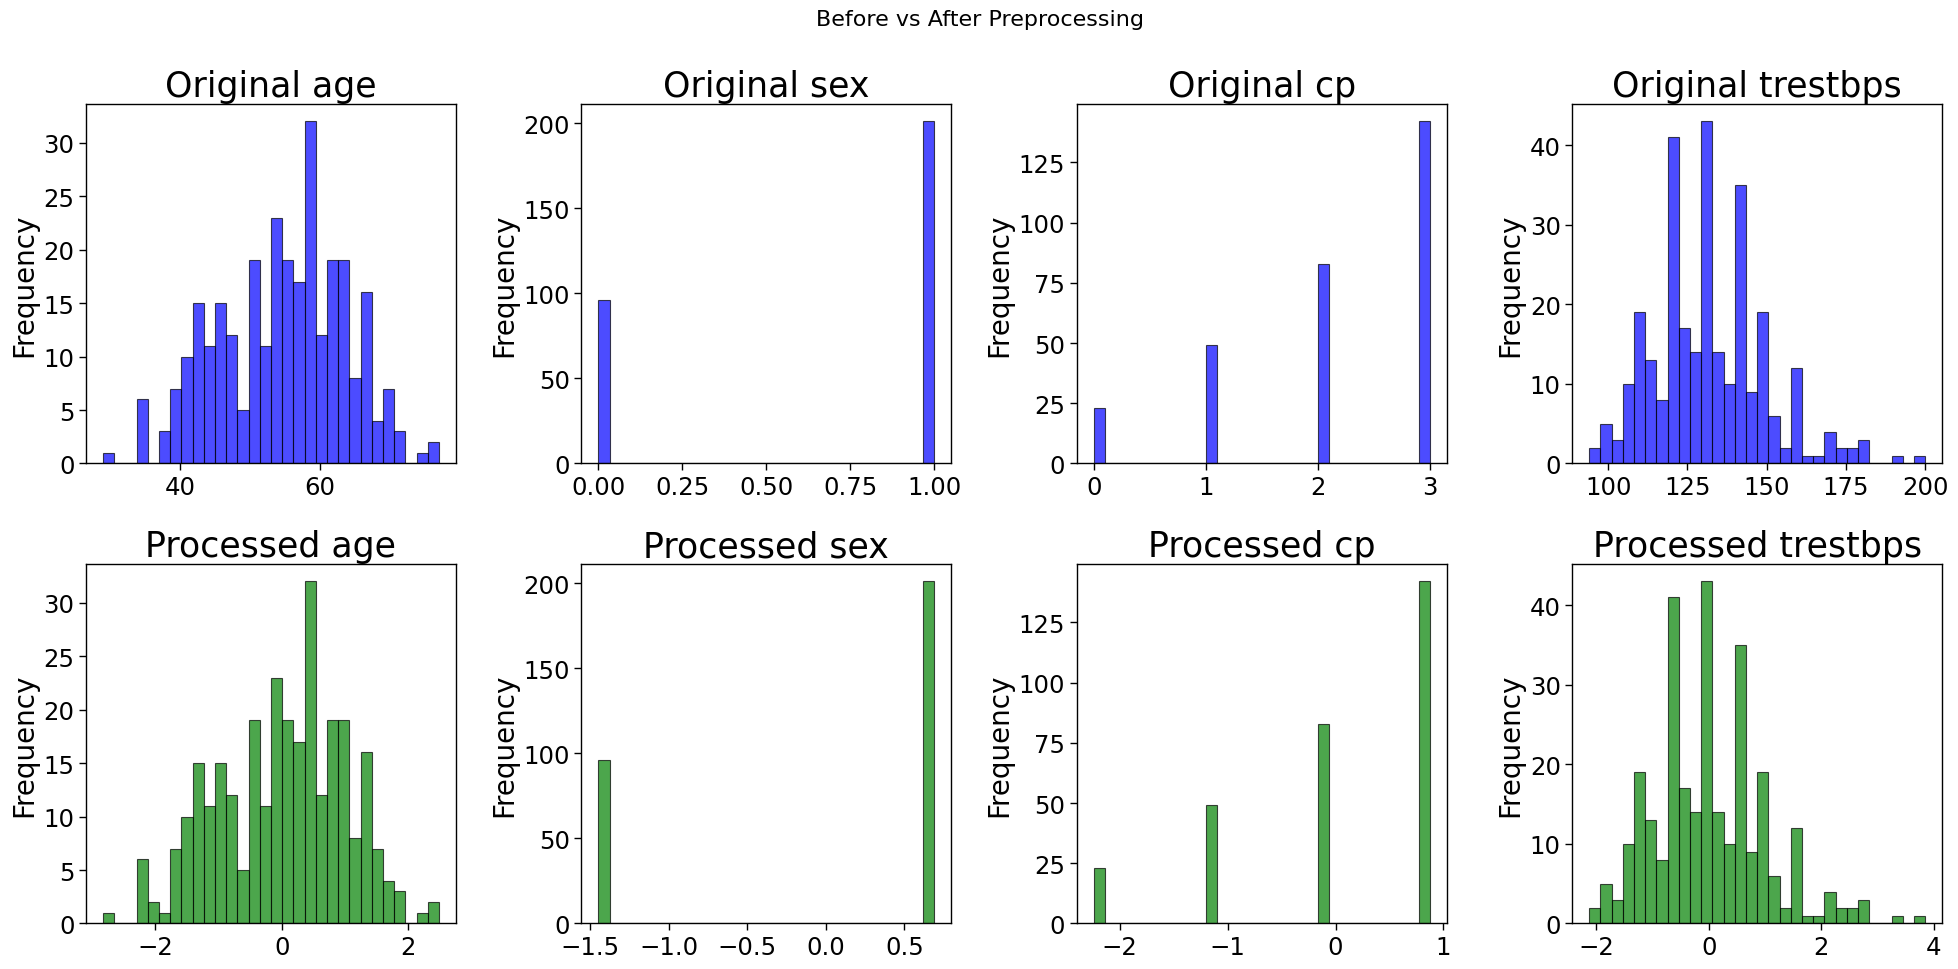

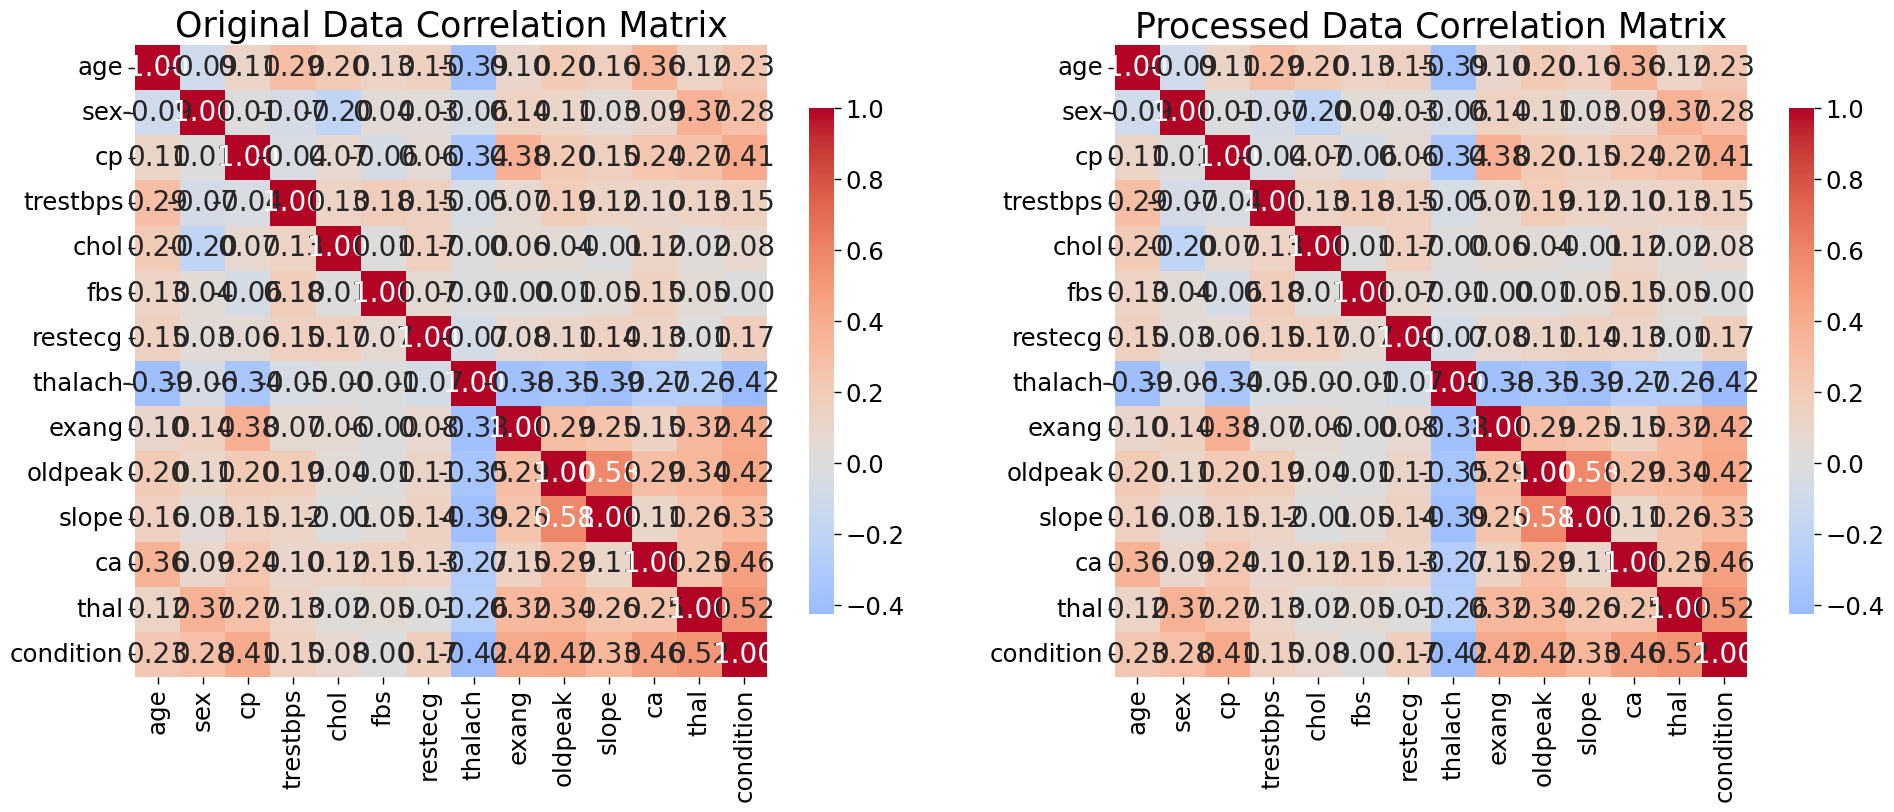


PREPROCESSING SUMMARY
✅ Data loaded: 297 rows, 14 columns
✅ Missing values handled
✅ Duplicates removed
✅ Outliers detected
✅ Features encoded
✅ Features normalized using standard scaling
✅ Final processed data shape: (297, 14)
✅ Processed data saved to: heart_disease_processed_standard.csv
HEART DISEASE DATA PREPROCESSING PIPELINE
Dataset loaded successfully!
Shape: (297, 14)

DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 

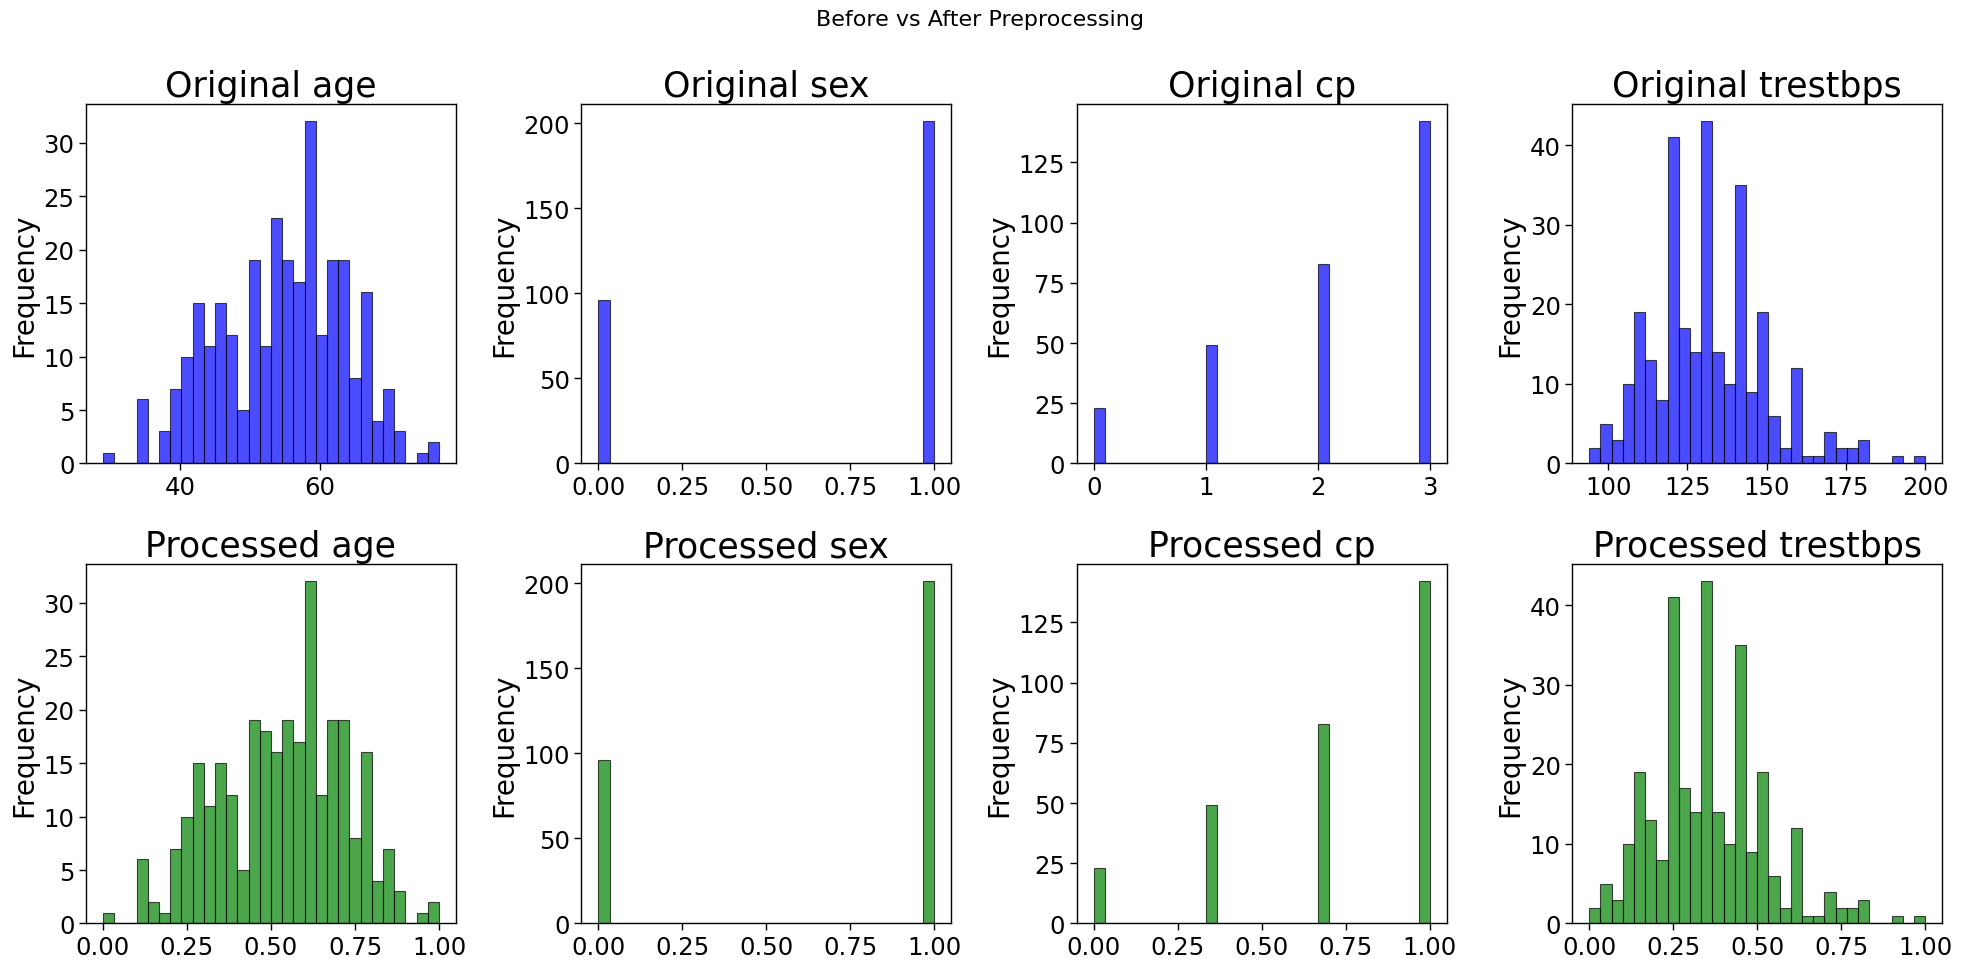

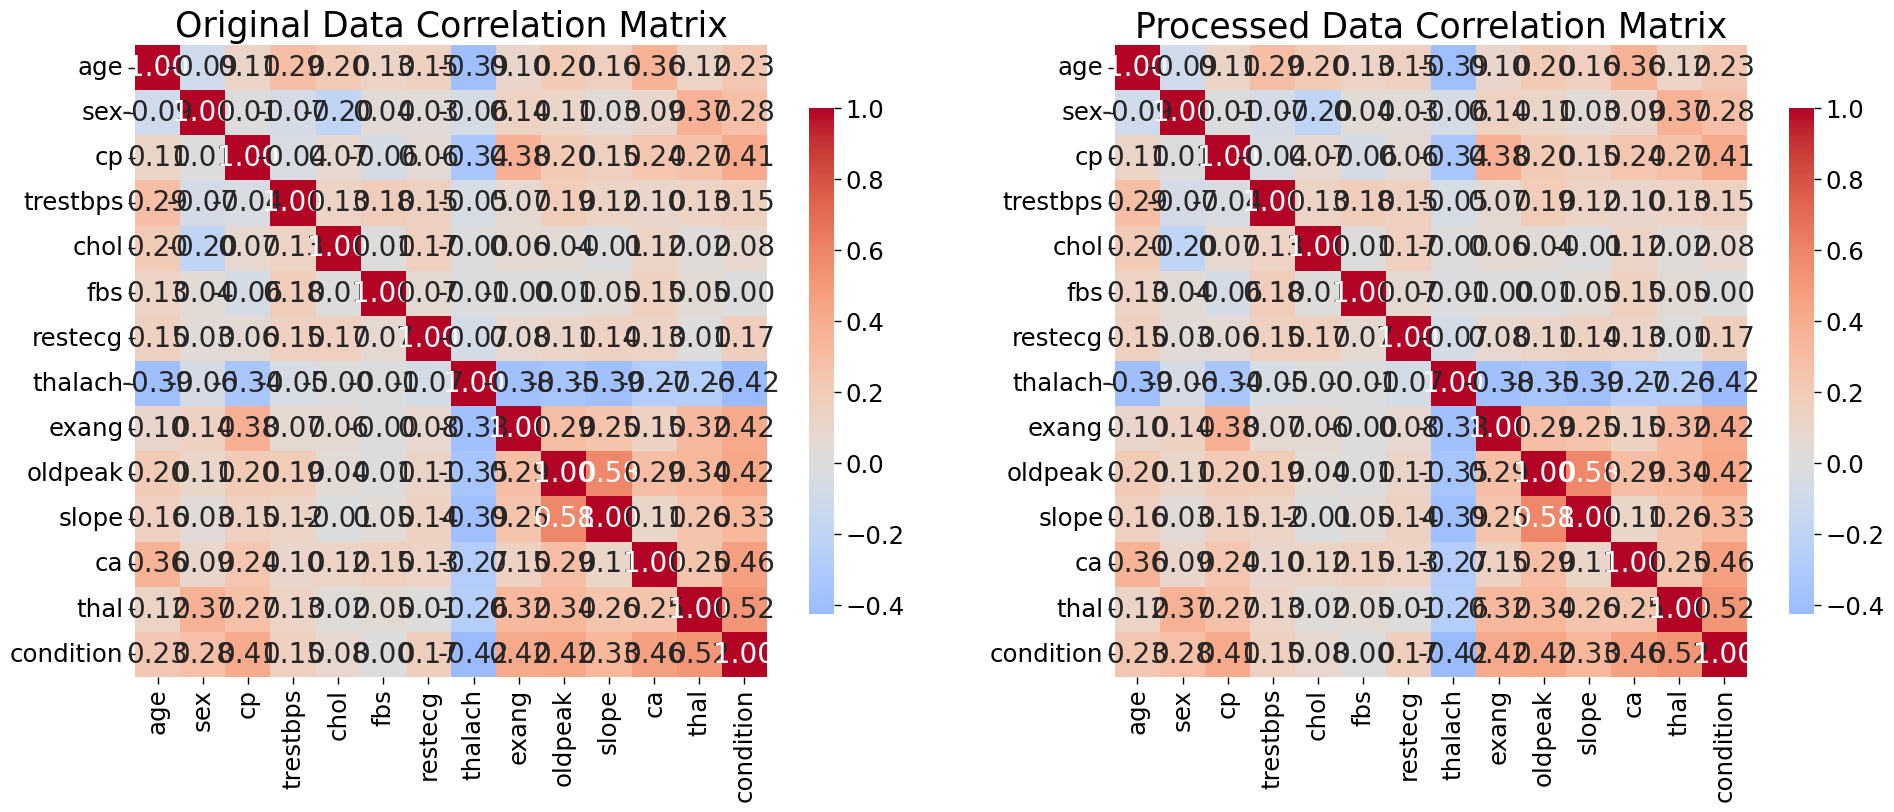


PREPROCESSING SUMMARY
✅ Data loaded: 297 rows, 14 columns
✅ Missing values handled
✅ Duplicates removed
✅ Outliers detected
✅ Features encoded
✅ Features normalized using minmax scaling
✅ Final processed data shape: (297, 14)
✅ Processed data saved to: heart_disease_processed_minmax.csv
HEART DISEASE DATA PREPROCESSING PIPELINE
Dataset loaded successfully!
Shape: (297, 14)

DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  

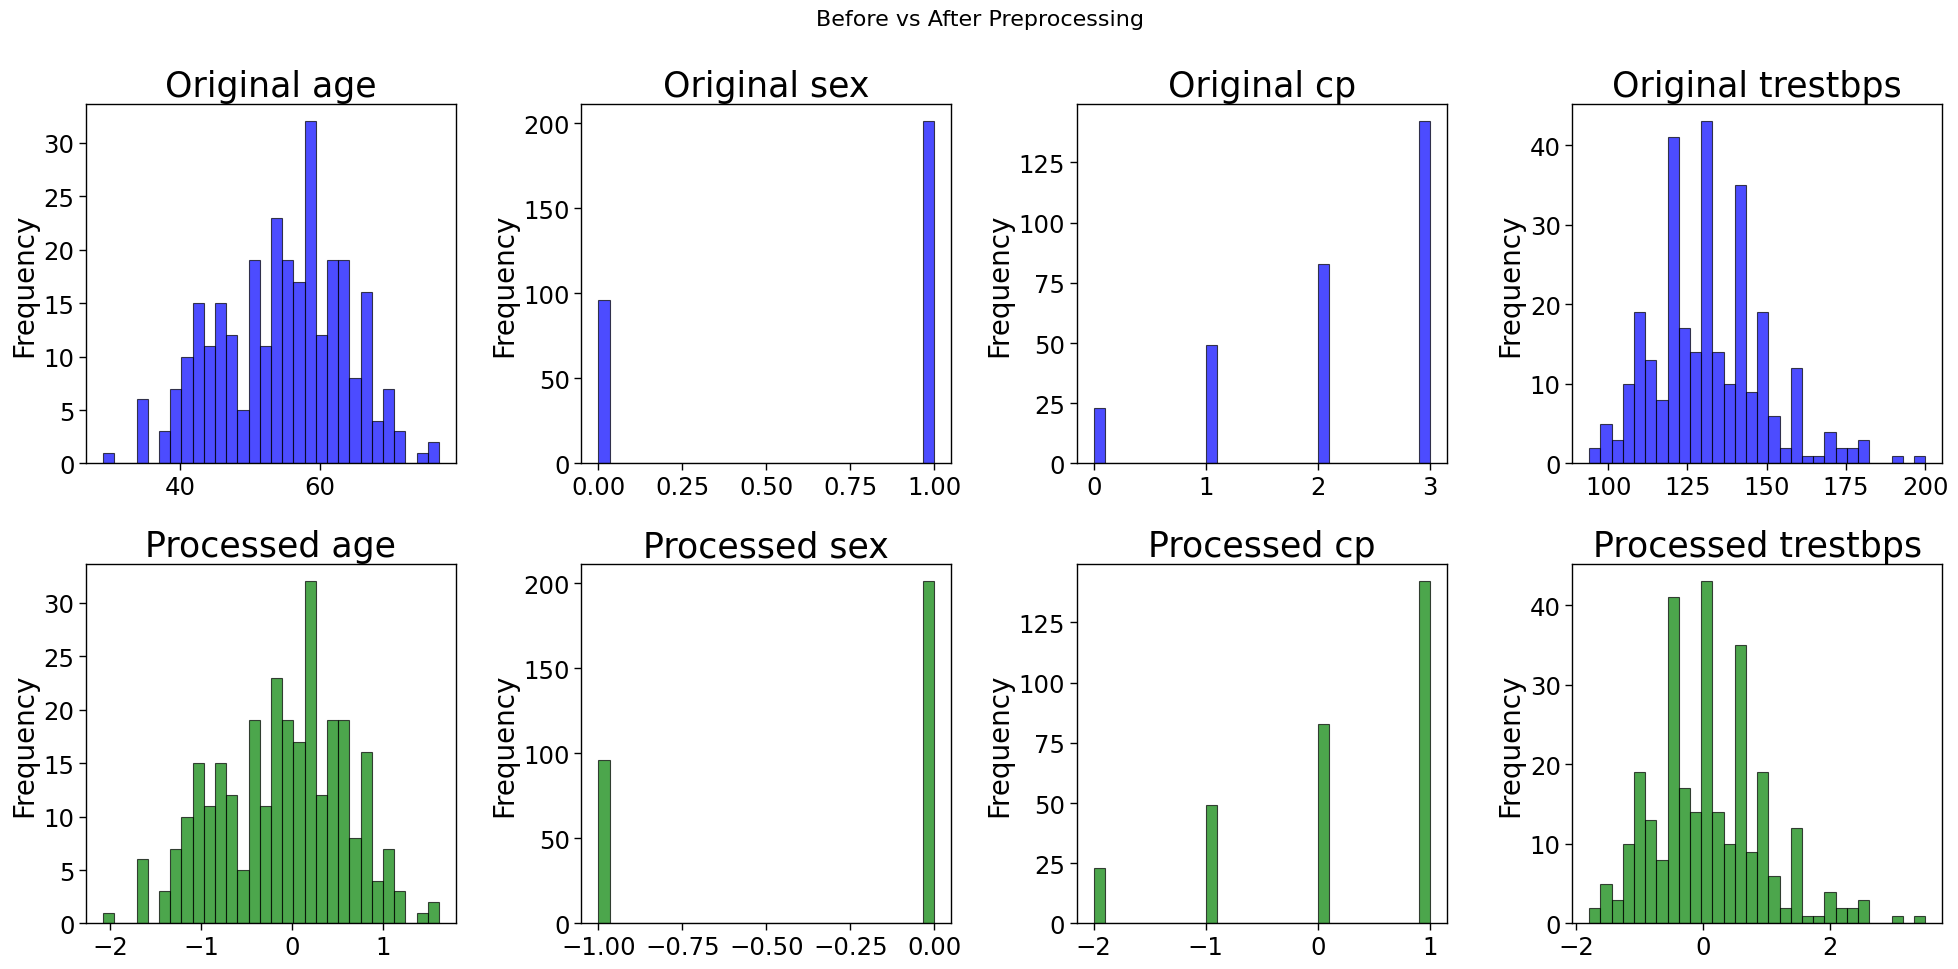

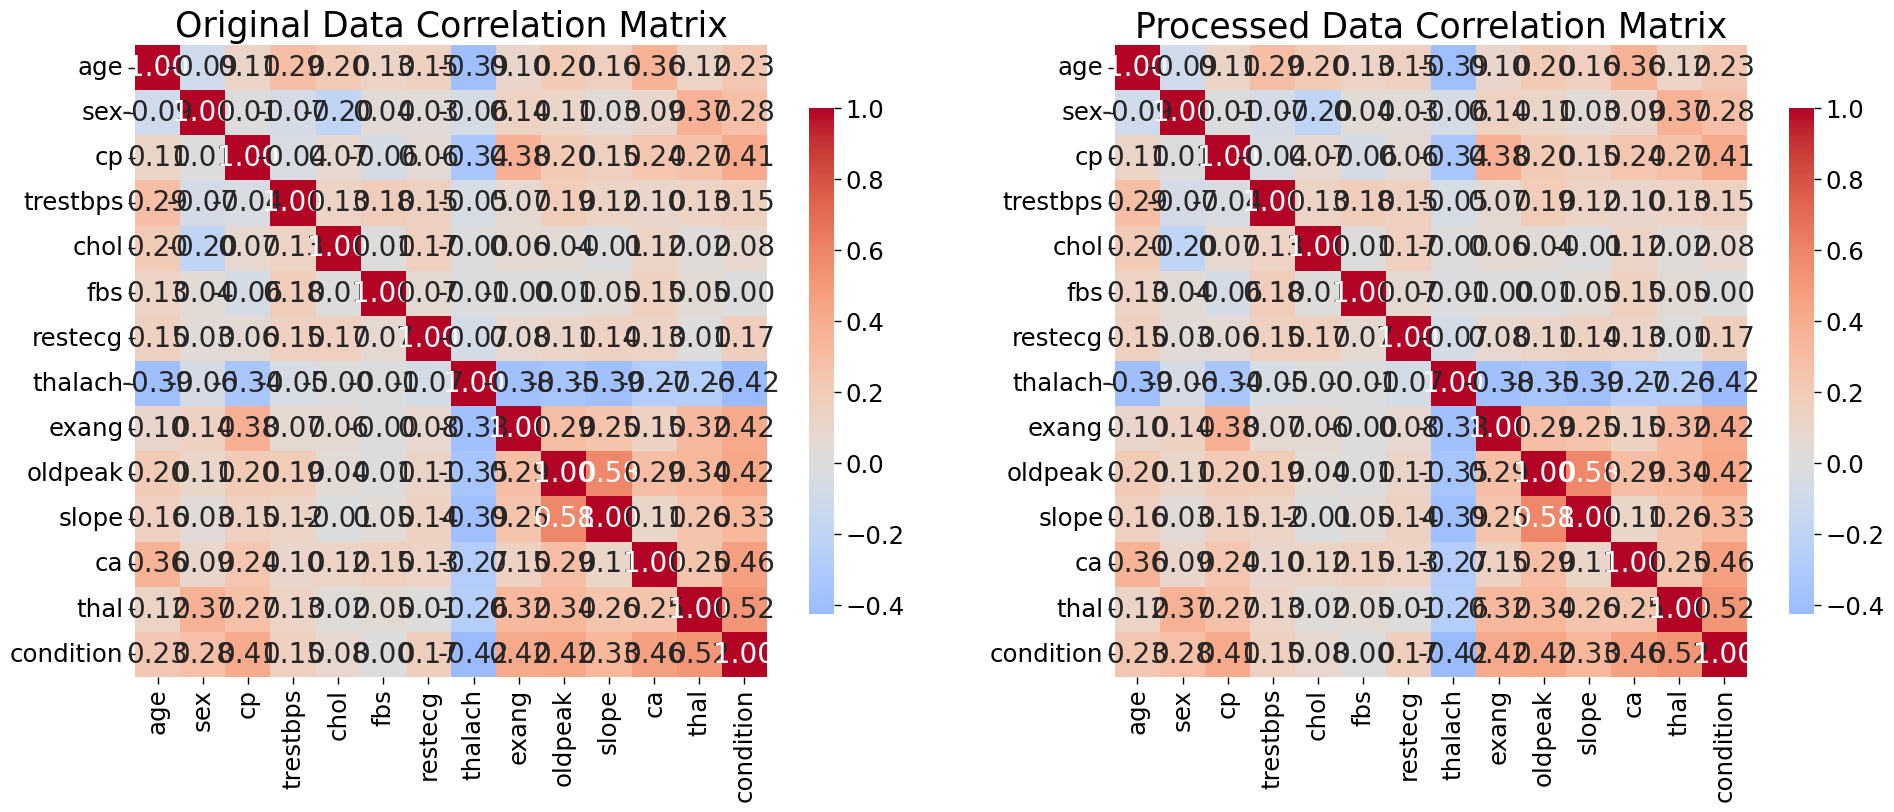


PREPROCESSING SUMMARY
✅ Data loaded: 297 rows, 14 columns
✅ Missing values handled
✅ Duplicates removed
✅ Outliers detected
✅ Features encoded
✅ Features normalized using robust scaling
✅ Final processed data shape: (297, 14)
✅ Processed data saved to: heart_disease_processed_robust.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
def load_data(file_path='sample_data/heart_disease_uci.csv'):
    """Load the heart disease dataset"""
    df = pd.read_csv('sample_data/heart_disease_uci.csv')
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    return df

# Basic data exploration
def explore_data(df):
    """Perform basic data exploration"""
    print("\n" + "="*50)
    print("DATA EXPLORATION")
    print("="*50)

    print("\nDataset Info:")
    print(df.info())

    print("\nFirst 5 rows:")
    print(df.head())

    print("\nBasic Statistics:")
    print(df.describe())

    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    print("\nData Types:")
    print(df.dtypes)

    print("\nUnique values per column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    return df

# Handle missing values
def handle_missing_values(df):
    """Handle missing values in the dataset"""
    print("\n" + "="*50)
    print("HANDLING MISSING VALUES")
    print("="*50)

    # Check for missing values
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.DataFrame({
        'Column': missing_count.index,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percent.values
    })

    print("\nMissing Values Summary:")
    print(missing_df[missing_df['Missing Count'] > 0])

    # For this dataset, we'll handle any missing values
    # Numerical columns: use median imputation
    # Categorical columns: use mode imputation

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Impute numerical columns with median
    if len(numerical_cols) > 0:
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    # Impute categorical columns with mode
    if len(categorical_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    print(f"\nAfter imputation - Missing values: {df.isnull().sum().sum()}")

    return df

# Remove duplicates
def remove_duplicates(df):
    """Remove duplicate rows"""
    print("\n" + "="*50)
    print("REMOVING DUPLICATES")
    print("="*50)

    initial_shape = df.shape
    df_clean = df.drop_duplicates()
    final_shape = df_clean.shape

    duplicates_removed = initial_shape[0] - final_shape[0]

    print(f"Initial shape: {initial_shape}")
    print(f"Final shape: {final_shape}")
    print(f"Duplicates removed: {duplicates_removed}")

    return df_clean

# Detect and handle outliers
def detect_outliers(df, method='iqr'):
    """Detect outliers using IQR or Z-score method"""
    print("\n" + "="*50)
    print("OUTLIER DETECTION")
    print("="*50)

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outlier_info = {}

    for col in numerical_cols:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(df[col]))
            outliers = df[z_scores > 3]

        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        outlier_info[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage
        }

        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

    return outlier_info

# Feature encoding
def encode_features(df):
    """Encode categorical features"""
    print("\n" + "="*50)
    print("FEATURE ENCODING")
    print("="*50)

    df_encoded = df.copy()
    encoding_info = {}

    # Identify categorical columns (assuming all are already numeric in this dataset)
    categorical_cols = df.select_dtypes(include=['object']).columns

    if len(categorical_cols) > 0:
        print("Categorical columns found:")
        for col in categorical_cols:
            print(f"  {col}: {df[col].unique()}")

            # Use Label Encoding for binary/ordinal categories
            le = LabelEncoder()
            df_encoded[col] = le.fit_transform(df[col])
            encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

        print("\nEncoding mappings:")
        for col, mapping in encoding_info.items():
            print(f"{col}: {mapping}")
    else:
        print("No categorical columns found - all features are already numeric")

    return df_encoded, encoding_info

# Feature normalization/standardization
def normalize_features(df, method='standard'):
    """Normalize features using different methods"""
    print("\n" + "="*50)
    print(f"FEATURE NORMALIZATION ({method.upper()})")
    print("="*50)

    # Separate target variable (assuming 'condition' is the target)
    target_col = 'condition'
    feature_cols = [col for col in df.columns if col != target_col]

    X = df[feature_cols].copy()
    y = df[target_col].copy()

    # Store original statistics
    original_stats = X.describe()

    # Apply normalization
    if method == 'standard':
        scaler = StandardScaler()
        X_normalized = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        print("Applied Standard Scaler (mean=0, std=1)")

    elif method == 'minmax':
        scaler = MinMaxScaler()
        X_normalized = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        print("Applied Min-Max Scaler (range 0-1)")

    elif method == 'robust':
        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        X_normalized = pd.DataFrame(
            scaler.fit_transform(X),
            columns=X.columns,
            index=X.index
        )
        print("Applied Robust Scaler (median and IQR)")

    # Combine normalized features with target
    df_normalized = pd.concat([X_normalized, y], axis=1)

    # Display normalization statistics
    normalized_stats = X_normalized.describe()

    print(f"\nNormalization Statistics:")
    print(f"Original data shape: {X.shape}")
    print(f"Normalized data shape: {X_normalized.shape}")

    print(f"\nBefore normalization (first 5 features):")
    print(original_stats.iloc[:, :5].round(3))

    print(f"\nAfter normalization (first 5 features):")
    print(normalized_stats.iloc[:, :5].round(3))

    return df_normalized, scaler, original_stats, normalized_stats

# Feature scaling comparison
def compare_scaling_methods(df):
    """Compare different scaling methods"""
    print("\n" + "="*50)
    print("SCALING METHODS COMPARISON")
    print("="*50)

    # Select a few features for comparison
    target_col = 'condition'
    feature_cols = [col for col in df.columns if col != target_col]
    sample_features = feature_cols[:4]  # First 4 features for comparison

    X_sample = df[sample_features]

    # Apply different scaling methods
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    X_standard = pd.DataFrame(
        standard_scaler.fit_transform(X_sample),
        columns=X_sample.columns
    )

    X_minmax = pd.DataFrame(
        minmax_scaler.fit_transform(X_sample),
        columns=X_sample.columns
    )

    # Create comparison dataframe
    comparison_stats = pd.DataFrame({
        'Original_Mean': X_sample.mean(),
        'Original_Std': X_sample.std(),
        'Standard_Mean': X_standard.mean(),
        'Standard_Std': X_standard.std(),
        'MinMax_Mean': X_minmax.mean(),
        'MinMax_Std': X_minmax.std()
    }).round(3)

    print("Scaling Comparison (sample features):")
    print(comparison_stats)

    return comparison_stats

# Create visualization for preprocessing results
def visualize_preprocessing(df_original, df_processed):
    """Create visualizations to show preprocessing effects"""
    print("\n" + "="*50)
    print("CREATING PREPROCESSING VISUALIZATIONS")
    print("="*50)

    # Select numerical columns for visualization
    numerical_cols = df_original.select_dtypes(include=[np.number]).columns
    sample_cols = numerical_cols[:4]  # First 4 numerical columns

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Before vs After Preprocessing', fontsize=16)

    for i, col in enumerate(sample_cols):
        # Original data distribution
        axes[0, i].hist(df_original[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
        axes[0, i].set_title(f'Original {col}')
        axes[0, i].set_ylabel('Frequency')

        # Processed data distribution
        if col in df_processed.columns:
            axes[1, i].hist(df_processed[col], bins=30, alpha=0.7, color='green', edgecolor='black')
            axes[1, i].set_title(f'Processed {col}')
            axes[1, i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Correlation heatmap comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Original correlation matrix
    corr_original = df_original.corr()
    sns.heatmap(corr_original, annot=True, cmap='coolwarm', center=0,
                square=True, ax=ax1, fmt='.2f', cbar_kws={'shrink': 0.8})
    ax1.set_title('Original Data Correlation Matrix')

    # Processed correlation matrix
    corr_processed = df_processed.corr()
    sns.heatmap(corr_processed, annot=True, cmap='coolwarm', center=0,
                square=True, ax=ax2, fmt='.2f', cbar_kws={'shrink': 0.8})
    ax2.set_title('Processed Data Correlation Matrix')

    plt.tight_layout()
    plt.show()

# Main preprocessing pipeline
def preprocessing_pipeline(file_path='heart_disease_uci.csv', scaling_method='standard'):
    """Complete preprocessing pipeline"""
    print("HEART DISEASE DATA PREPROCESSING PIPELINE")
    print("=" * 60)

    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Explore data
    df = explore_data(df)

    # Step 3: Handle missing values
    df = handle_missing_values(df)

    # Step 4: Remove duplicates
    df = remove_duplicates(df)

    # Step 5: Detect outliers
    outlier_info = detect_outliers(df)

    # Step 6: Encode categorical features
    df_encoded, encoding_info = encode_features(df)

    # Step 7: Compare scaling methods
    scaling_comparison = compare_scaling_methods(df_encoded)

    # Step 8: Normalize features
    df_normalized, scaler, original_stats, normalized_stats = normalize_features(
        df_encoded, method=scaling_method
    )

    # Step 9: Create visualizations
    visualize_preprocessing(df_encoded, df_normalized)

    # Summary
    print("\n" + "="*60)
    print("PREPROCESSING SUMMARY")
    print("="*60)
    print(f"✅ Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"✅ Missing values handled")
    print(f"✅ Duplicates removed")
    print(f"✅ Outliers detected")
    print(f"✅ Features encoded")
    print(f"✅ Features normalized using {scaling_method} scaling")
    print(f"✅ Final processed data shape: {df_normalized.shape}")

    # Save processed data
    output_file = f'heart_disease_processed_{scaling_method}.csv'
    df_normalized.to_csv(output_file, index=False)
    print(f"✅ Processed data saved to: {output_file}")

    return {
        'original_data': df,
        'processed_data': df_normalized,
        'scaler': scaler,
        'encoding_info': encoding_info,
        'outlier_info': outlier_info,
        'scaling_comparison': scaling_comparison,
        'original_stats': original_stats,
        'normalized_stats': normalized_stats
    }

# Example usage
if __name__ == "__main__":
    # Run the complete preprocessing pipeline
    results = preprocessing_pipeline(scaling_method='standard')

    # Access individual components
    processed_data = results['processed_data']
    scaler = results['scaler']

    print(f"\nProcessed data sample:")
    print(processed_data.head())

    # You can also try different scaling methods
    print("\n" + "="*60)
    print("TRYING DIFFERENT SCALING METHODS")
    print("="*60)

    # Standard scaling
    results_standard = preprocessing_pipeline(scaling_method='standard')

    # Min-Max scaling
    results_minmax = preprocessing_pipeline(scaling_method='minmax')

    # Robust scaling
    results_robust = preprocessing_pipeline(scaling_method='robust')

4. Diving Data into train and test sets. (2 Marks)
5. Applying atleast 3 classifiers like Logistic Regression, SVM, Decision Tree, K-NN, Random Forest etc.

Dataset Information:
Shape: (297, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------    

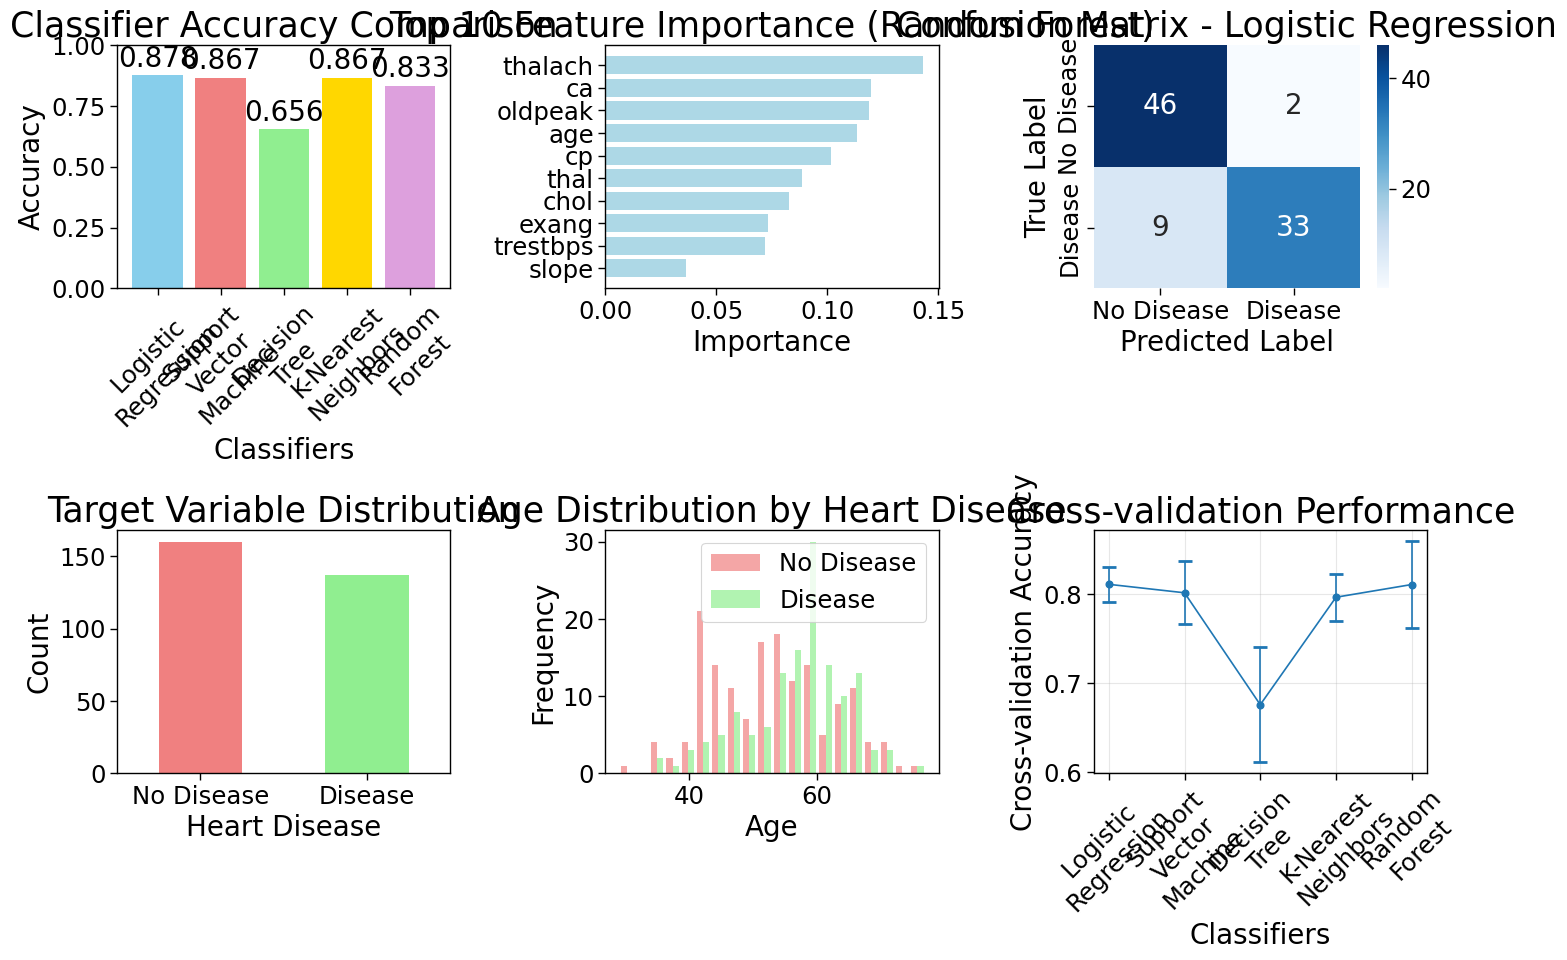


ADDITIONAL ANALYSIS

Feature correlation with target variable:
thal        0.520516
ca          0.463189
oldpeak     0.424052
thalach     0.423817
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
Name: condition, dtype: float64

Detailed comparison for Logistic Regression:
Precision: 0.9429
Recall: 0.7857
F1-Score: 0.8571

Hyperparameter tuning suggestions:
1. Logistic Regression: Try different C values (0.01, 0.1, 1, 10, 100)
2. SVM: Experiment with different kernels ('linear', 'poly', 'rbf') and C values
3. Decision Tree: Tune max_depth, min_samples_split, min_samples_leaf
4. K-NN: Test different k values (3, 5, 7, 9, 11)
5. Random Forest: Adjust n_estimators, max_depth, min_samples_split

Model deployment ready!
Best model: Logistic Regression
Scaler fitted: Yes


In [ ]:
# Heart Disease Classification - Multiple Classifiers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the data
# Note: Replace 'heart_disease_uci.csv' with your actual file path
df = pd.read_csv('sample_data/heart_disease_uci.csv')

print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nTarget variable distribution:")
print(df['condition'].value_counts())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Prepare features and target
X = df.drop('condition', axis=1)  # Features
y = df['condition']  # Target variable

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# 1. SPLIT DATA INTO TRAIN AND TEST SETS
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,     # 70% train, 30% test
    random_state=42,   # For reproducibility
    stratify=y         # Maintain class distribution
)

print(f"\nTrain set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Train target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

# Feature scaling (important for SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. APPLY MULTIPLE CLASSIFIERS

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42, kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Store results
results = {}
predictions = {}

print("\n" + "="*80)
print("CLASSIFIER PERFORMANCE COMPARISON")
print("="*80)

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n{name}:")
    print("-" * len(name))

    # Use scaled data for SVM and KNN, original for tree-based methods
    if name in ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    # Train the classifier
    clf.fit(X_train_use, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_use)
    predictions[name] = y_pred

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"Test Accuracy: {accuracy:.4f}")

    # Cross-validation score
    cv_scores = cross_val_score(clf, X_train_use, y_train, cv=5)
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))

# 3. RESULTS SUMMARY
print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print(f"{'Classifier':<25} {'Accuracy':<10}")
print("-" * 35)
for name, accuracy in sorted_results:
    print(f"{name:<25} {accuracy:.4f}")

# Find best classifier
best_classifier = sorted_results[0][0]
print(f"\nBest Classifier: {best_classifier} with accuracy: {sorted_results[0][1]:.4f}")

# 4. VISUALIZATION
plt.figure(figsize=(15, 10))

# Subplot 1: Accuracy comparison
plt.subplot(2, 3, 1)
names = list(results.keys())
accuracies = list(results.values())
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

bars = plt.bar(range(len(names)), accuracies, color=colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(range(len(names)), [name.replace(' ', '\n') for name in names], rotation=45)
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

# Subplot 2: Feature importance (Random Forest)
plt.subplot(2, 3, 2)
rf_model = classifiers['Random Forest']
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = rf_model.feature_importances_
    feature_names = X.columns

    # Sort features by importance
    indices = np.argsort(feature_importance)[::-1][:10]  # Top 10 features

    plt.barh(range(len(indices)), feature_importance[indices], color='lightblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.gca().invert_yaxis()

# Subplot 3: Confusion Matrix for best classifier
plt.subplot(2, 3, 3)
best_pred = predictions[best_classifier]
cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_classifier}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Subplot 4: Target variable distribution
plt.subplot(2, 3, 4)
y.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)

# Subplot 5: Age distribution by target
plt.subplot(2, 3, 5)
plt.hist([df[df['condition']==0]['age'], df[df['condition']==1]['age']],
         bins=20, alpha=0.7, label=['No Disease', 'Disease'], color=['lightcoral', 'lightgreen'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Heart Disease')
plt.legend()

# Subplot 6: Cross-validation comparison
plt.subplot(2, 3, 6)
cv_means = []
cv_stds = []

for name, clf in classifiers.items():
    if name in ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression']:
        X_use = X_train_scaled
    else:
        X_use = X_train

    cv_scores = cross_val_score(clf, X_use, y_train, cv=5)
    cv_means.append(cv_scores.mean())
    cv_stds.append(cv_scores.std())

x_pos = range(len(names))
plt.errorbar(x_pos, cv_means, yerr=cv_stds, fmt='o-', capsize=5, capthick=2)
plt.xlabel('Classifiers')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation Performance')
plt.xticks(x_pos, [name.replace(' ', '\n') for name in names], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ADDITIONAL ANALYSIS
print("\n" + "="*80)
print("ADDITIONAL ANALYSIS")
print("="*80)

# Feature correlation with target
print("\nFeature correlation with target variable:")
correlation_with_target = df.corr()['condition'].abs().sort_values(ascending=False)
print(correlation_with_target[1:])  # Exclude self-correlation

# Model comparison with different metrics
print(f"\nDetailed comparison for {best_classifier}:")
best_pred = predictions[best_classifier]

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, best_pred)
recall = recall_score(y_test, best_pred)
f1 = f1_score(y_test, best_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Hyperparameter suggestions
print(f"\nHyperparameter tuning suggestions:")
print("1. Logistic Regression: Try different C values (0.01, 0.1, 1, 10, 100)")
print("2. SVM: Experiment with different kernels ('linear', 'poly', 'rbf') and C values")
print("3. Decision Tree: Tune max_depth, min_samples_split, min_samples_leaf")
print("4. K-NN: Test different k values (3, 5, 7, 9, 11)")
print("5. Random Forest: Adjust n_estimators, max_depth, min_samples_split")

print(f"\nModel deployment ready!")
print(f"Best model: {best_classifier}")
print(f"Scaler fitted: {'Yes' if best_classifier in ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression'] else 'No'}")

6.Evaluate model performance (using plotting Confusion Matrix, and finding Precision, Recall, Accuracy, F1-score)


Training models and collecting predictions...

Calculating performance metrics...

PERFORMANCE METRICS SUMMARY
            Classifier  Accuracy  Precision  Recall (Sensitivity)  Specificity  F1-Score
   Logistic Regression    0.8778     0.9429                0.7857       0.9583    0.8571
Support Vector Machine    0.8667     0.9412                0.7619       0.9583    0.8421
         Decision Tree    0.6556     0.6410                0.5952       0.7083    0.6173
   K-Nearest Neighbors    0.8667     0.9412                0.7619       0.9583    0.8421
         Random Forest    0.8333     0.8857                0.7381       0.9167    0.8052

Generating confusion matrices...
Generating ROC curves...
Generating Precision-Recall curves...


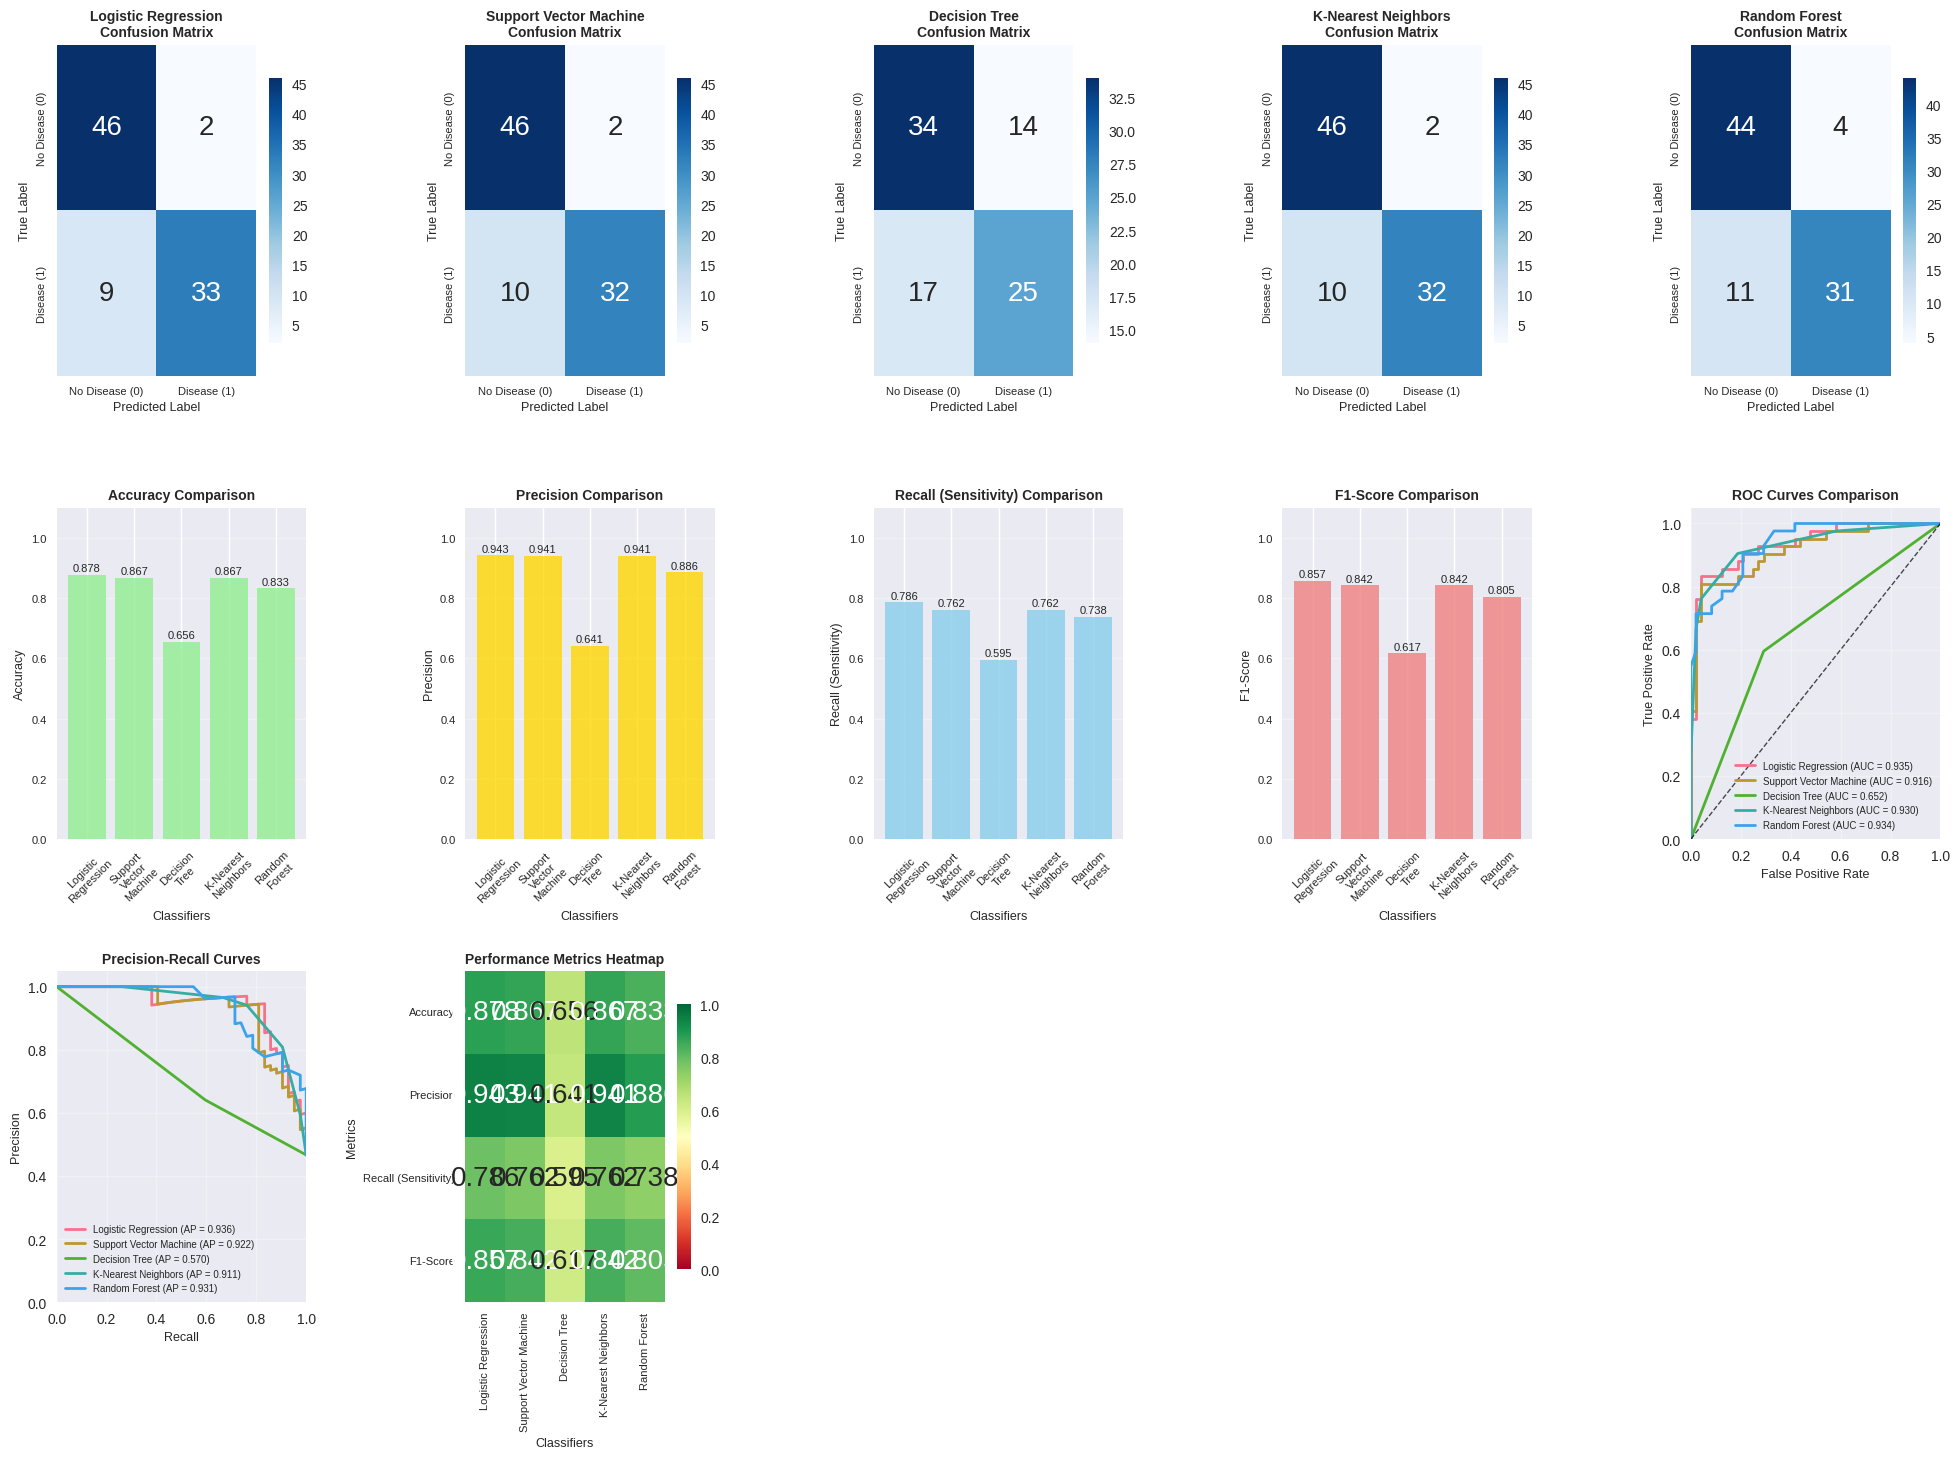


DETAILED CLASSIFICATION REPORTS

Logistic Regression:
-------------------
              precision    recall  f1-score   support

  No Disease       0.84      0.96      0.89        48
     Disease       0.94      0.79      0.86        42

    accuracy                           0.88        90
   macro avg       0.89      0.87      0.88        90
weighted avg       0.89      0.88      0.88        90


Support Vector Machine:
----------------------
              precision    recall  f1-score   support

  No Disease       0.82      0.96      0.88        48
     Disease       0.94      0.76      0.84        42

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.88      0.87      0.86        90


Decision Tree:
-------------
              precision    recall  f1-score   support

  No Disease       0.67      0.71      0.69        48
     Disease       0.64      0.60      0.62        42

    accuracy                 

In [60]:
# Comprehensive Model Performance Evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load and prepare data
df = pd.read_csv('sample_data/heart_disease_uci.csv')
X = df.drop('condition', axis=1)
y = df['condition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42, kernel='rbf', probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train models and collect predictions
models = {}
predictions = {}
probabilities = {}

print("Training models and collecting predictions...")
print("=" * 60)

for name, clf in classifiers.items():
    # Use scaled data for algorithms that benefit from it
    if name in ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic Regression']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_test_use = X_test

    # Train model
    clf.fit(X_train_use, y_train)
    models[name] = clf

    # Get predictions
    y_pred = clf.predict(X_test_use)
    predictions[name] = y_pred

    # Get probabilities for ROC curve (if available)
    if hasattr(clf, 'predict_proba'):
        y_prob = clf.predict_proba(X_test_use)[:, 1]
        probabilities[name] = y_prob
    elif hasattr(clf, 'decision_function'):
        y_prob = clf.decision_function(X_test_use)
        probabilities[name] = y_prob

# PERFORMANCE METRICS CALCULATION
print("\nCalculating performance metrics...")

# Create comprehensive metrics dataframe
metrics_data = []

for name in classifiers.keys():
    y_pred = predictions[name]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Calculate specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    metrics_data.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1
    })

metrics_df = pd.DataFrame(metrics_data)

# Display metrics table
print("\n" + "=" * 80)
print("PERFORMANCE METRICS SUMMARY")
print("=" * 80)
print(metrics_df.round(4).to_string(index=False))

# VISUALIZATION SECTION
fig = plt.figure(figsize=(20, 15))

# 1. CONFUSION MATRICES
print("\nGenerating confusion matrices...")
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(3, 5, i)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'],
                cbar_kws={'shrink': 0.8})

    plt.title(f'{name}\nConfusion Matrix', fontsize=10, fontweight='bold')
    plt.ylabel('True Label', fontsize=9)
    plt.xlabel('Predicted Label', fontsize=9)
    plt.tick_params(axis='both', labelsize=8)

# 2. METRICS COMPARISON BAR PLOTS
metrics_to_plot = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics_to_plot, 6):
    plt.subplot(3, 5, i)

    values = metrics_df[metric].values
    bars = plt.bar(range(len(classifiers)), values, color=colors[i % len(colors)], alpha=0.8)

    plt.xlabel('Classifiers', fontsize=9)
    plt.ylabel(metric, fontsize=9)
    plt.title(f'{metric} Comparison', fontsize=10, fontweight='bold')
    plt.xticks(range(len(classifiers)),
               [name.replace(' ', '\n') for name in classifiers.keys()],
               rotation=45, fontsize=8)
    plt.tick_params(axis='y', labelsize=8)

    # Add value labels on bars
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{val:.3f}', ha='center', va='bottom', fontsize=8)

    plt.ylim(0, 1.1)
    plt.grid(axis='y', alpha=0.3)

# 3. ROC CURVES
plt.subplot(3, 5, 10)
print("Generating ROC curves...")

roc_data = []
for name in classifiers.keys():
    if name in probabilities:
        fpr, tpr, _ = roc_curve(y_test, probabilities[name])
        roc_auc = auc(fpr, tpr)
        roc_data.append((name, roc_auc))
        plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=9)
plt.ylabel('True Positive Rate', fontsize=9)
plt.title('ROC Curves Comparison', fontsize=10, fontweight='bold')
plt.legend(fontsize=7, loc='lower right')
plt.grid(alpha=0.3)

# 4. PRECISION-RECALL CURVES
plt.subplot(3, 5, 11)
print("Generating Precision-Recall curves...")

for name in classifiers.keys():
    if name in probabilities:
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, probabilities[name])
        avg_precision = average_precision_score(y_test, probabilities[name])
        plt.plot(recall_curve, precision_curve, linewidth=2,
                label=f'{name} (AP = {avg_precision:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=9)
plt.ylabel('Precision', fontsize=9)
plt.title('Precision-Recall Curves', fontsize=10, fontweight='bold')
plt.legend(fontsize=7, loc='lower left')
plt.grid(alpha=0.3)

# 5. OVERALL METRICS HEATMAP
plt.subplot(3, 5, 12)
metrics_matrix = metrics_df.set_index('Classifier')[['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score']]
sns.heatmap(metrics_matrix.T, annot=True, fmt='.3f', cmap='RdYlGn',
            cbar_kws={'shrink': 0.8}, vmin=0, vmax=1)
plt.title('Performance Metrics Heatmap', fontsize=10, fontweight='bold')
plt.xlabel('Classifiers', fontsize=9)
plt.ylabel('Metrics', fontsize=9)
plt.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

# DETAILED CLASSIFICATION REPORTS
print("\n" + "=" * 80)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 80)

for name, y_pred in predictions.items():
    print(f"\n{name}:")
    print("-" * len(name))
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

# BEST MODEL IDENTIFICATION
print("\n" + "=" * 80)
print("BEST MODEL ANALYSIS")
print("=" * 80)

# Find best model based on different metrics
best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]
best_precision = metrics_df.loc[metrics_df['Precision'].idxmax()]
best_recall = metrics_df.loc[metrics_df['Recall (Sensitivity)'].idxmax()]
best_f1 = metrics_df.loc[metrics_df['F1-Score'].idxmax()]

print(f"Best Accuracy: {best_accuracy['Classifier']} ({best_accuracy['Accuracy']:.4f})")
print(f"Best Precision: {best_precision['Classifier']} ({best_precision['Precision']:.4f})")
print(f"Best Recall: {best_recall['Classifier']} ({best_recall['Recall (Sensitivity)']:.4f})")
print(f"Best F1-Score: {best_f1['Classifier']} ({best_f1['F1-Score']:.4f})")

# Overall best model (based on F1-score)
best_overall = best_f1['Classifier']
print(f"\nOverall Best Model: {best_overall} (based on F1-Score)")

# CONFUSION MATRIX ANALYSIS
print(f"\nDetailed Confusion Matrix Analysis for {best_overall}:")
best_pred = predictions[best_overall]
cm = confusion_matrix(y_test, best_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"Total Samples: {tn + fp + fn + tp}")

# Error Analysis
print(f"\nError Analysis:")
print(f"Type I Error (False Positive Rate): {fp/(fp+tn):.4f}")
print(f"Type II Error (False Negative Rate): {fn/(fn+tp):.4f}")

# ROC AUC Summary
if roc_data:
    print(f"\nROC AUC Scores:")
    roc_data.sort(key=lambda x: x[1], reverse=True)
    for name, auc_score in roc_data:
        print(f"{name}: {auc_score:.4f}")

# Model Selection Recommendations
print(f"\n" + "=" * 80)
print("MODEL SELECTION RECOMMENDATIONS")
print("=" * 80)
print("• For balanced performance: Choose model with highest F1-score")
print("• For minimizing false positives: Choose model with highest precision")
print("• For minimizing false negatives: Choose model with highest recall")
print("• For overall correctness: Choose model with highest accuracy")
print(f"• For clinical applications: Consider recall (sensitivity) to avoid missing diseases")

# Export results
metrics_df.to_csv('model_performance_metrics.csv', index=False)
print(f"\nMetrics saved to 'model_performance_metrics.csv'")

7. Plot (bar chart) feature contribution towards Class prediction.

8. Plot decision boundary for Logistic Regression.

Dataset shape: (297, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      

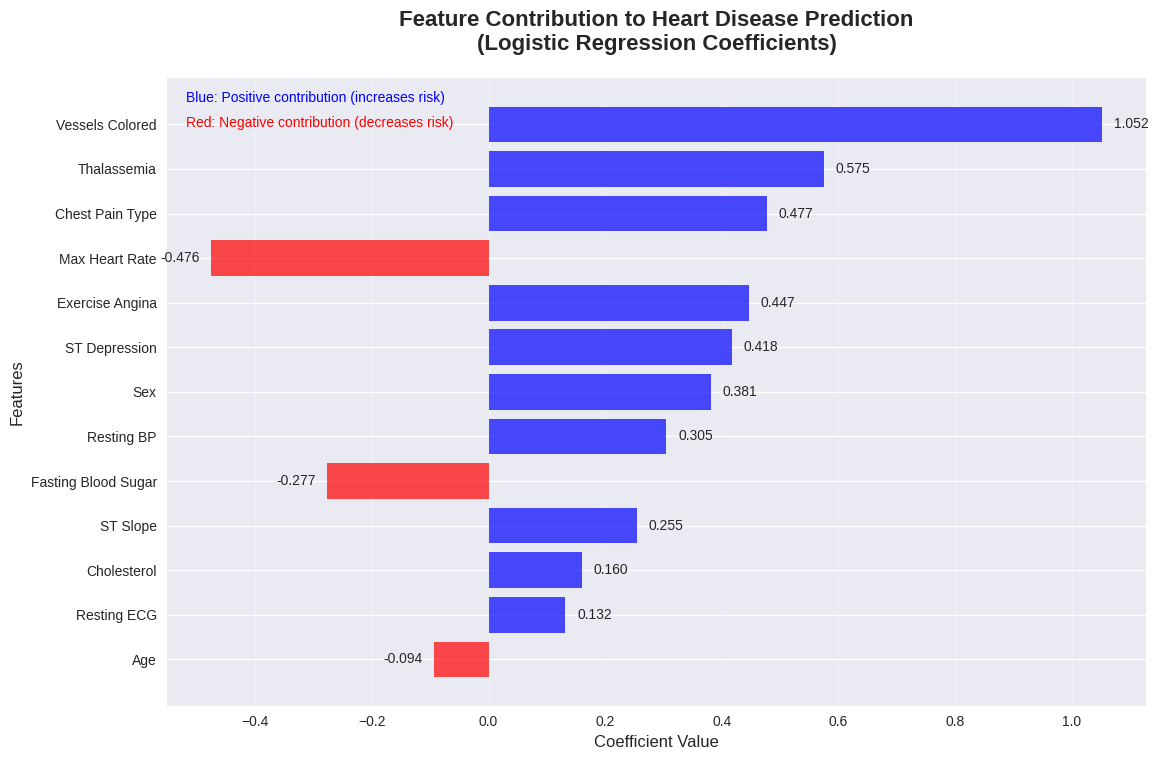


Feature Importance Summary:
----------------------------------------
Vessels Colored: 1.0520 (increases risk)
Thalassemia: 0.5754 (increases risk)
Chest Pain Type: 0.4769 (increases risk)
Max Heart Rate: -0.4759 (decreases risk)
Exercise Angina: 0.4470 (increases risk)
ST Depression: 0.4178 (increases risk)
Sex: 0.3811 (increases risk)
Resting BP: 0.3050 (increases risk)
Fasting Blood Sugar: -0.2768 (decreases risk)
ST Slope: 0.2550 (increases risk)
Cholesterol: 0.1596 (increases risk)
Resting ECG: 0.1318 (increases risk)
Age: -0.0935 (decreases risk)

2. DECISION BOUNDARY VISUALIZATION


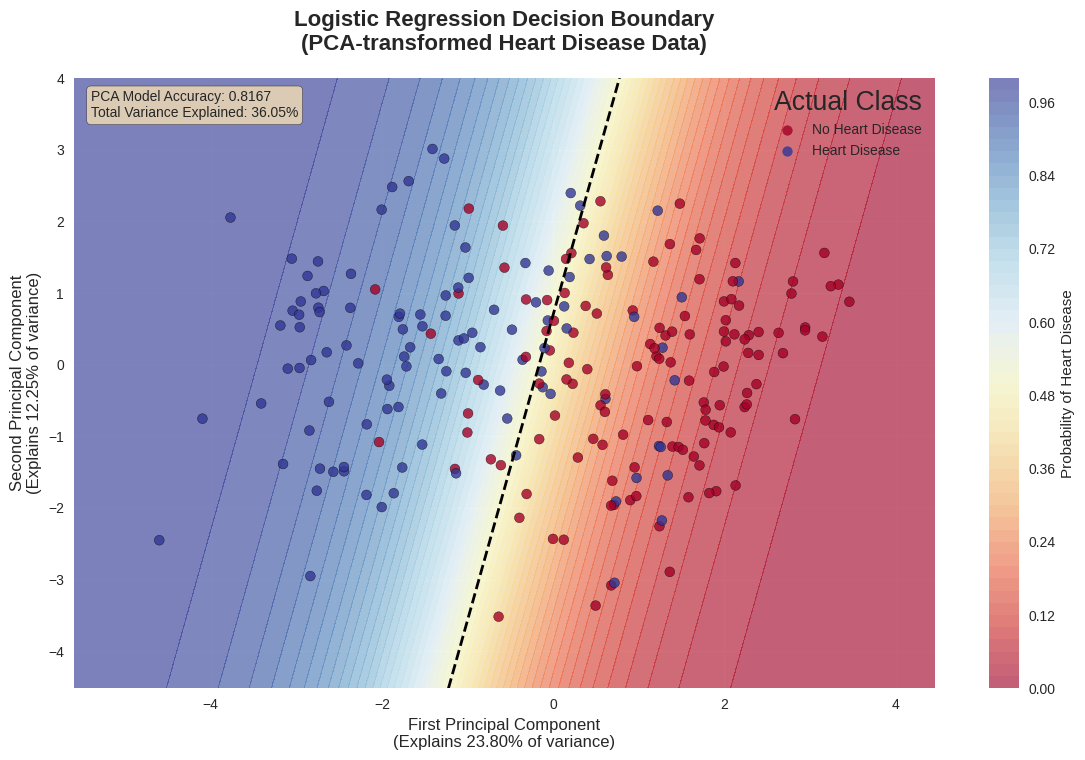


PCA Component Analysis:
------------------------------
Variance explained by PC1: 0.2380
Variance explained by PC2: 0.1225
Total variance explained: 0.3605

Top 5 features contributing to PC1:
  Max Heart Rate: 0.3997
  ST Depression: 0.3952
  ST Slope: 0.3493
  Thalassemia: 0.3309
  Exercise Angina: 0.3200

Top 5 features contributing to PC2:
  Sex: 0.4641
  Cholesterol: 0.4552
  Resting BP: 0.4194
  Age: 0.3768
  Thalassemia: 0.2677

3. FEATURE CORRELATION WITH TARGET
Feature correlations with heart disease:
----------------------------------------
Thalassemia: 0.5205
Vessels Colored: 0.4632
ST Depression: 0.4241
Max Heart Rate: -0.4238
Exercise Angina: 0.4214
Chest Pain Type: 0.4089
ST Slope: 0.3330
Sex: 0.2785
Age: 0.2271
Resting ECG: 0.1663
Resting BP: 0.1535
Cholesterol: 0.0803
Fasting Blood Sugar: 0.0032


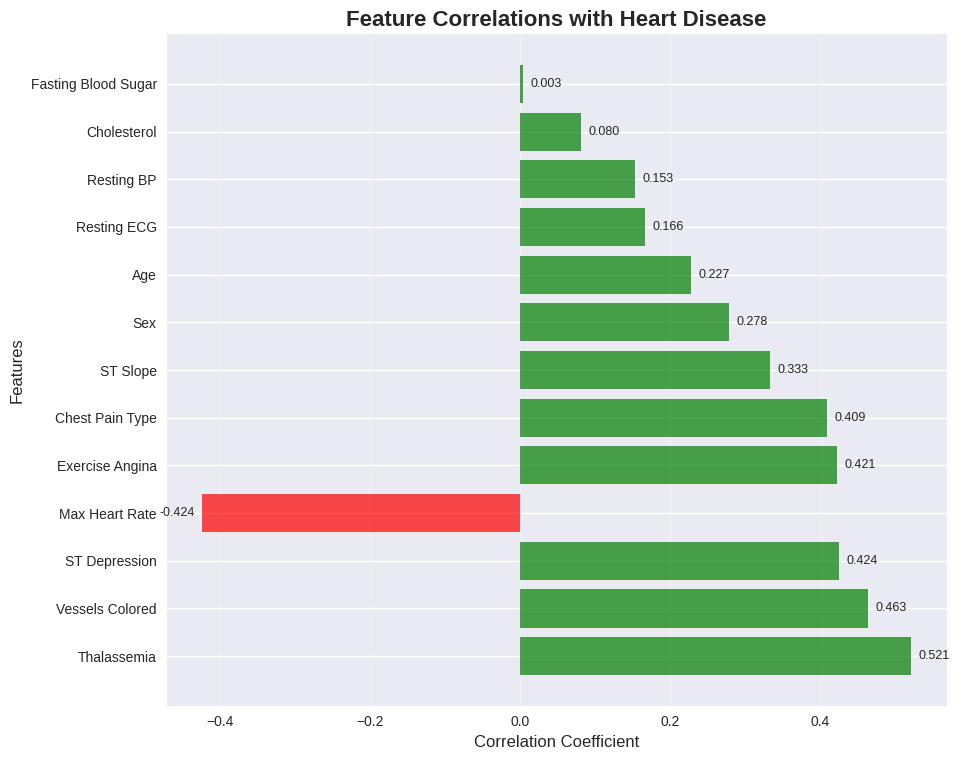


4. MODEL EVALUATION SUMMARY
Original Model Accuracy: 0.9167
PCA Model Accuracy: 0.8167

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('sample_data/heart_disease_uci.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Define feature names for better visualization
feature_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting BP',
    'chol': 'Cholesterol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalach': 'Max Heart Rate',
    'exang': 'Exercise Angina',
    'oldpeak': 'ST Depression',
    'slope': 'ST Slope',
    'ca': 'Vessels Colored',
    'thal': 'Thalassemia',
    'condition': 'Heart Disease'
}

# Prepare the data
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy:.4f}")

# 1. FEATURE CONTRIBUTION VISUALIZATION (Bar Chart)
print("\n" + "="*50)
print("1. FEATURE CONTRIBUTION ANALYSIS")
print("="*50)

# Get feature coefficients
coefficients = lr_model.coef_[0]
feature_importance = np.abs(coefficients)

# Create DataFrame for visualization
feature_df = pd.DataFrame({
    'Feature': [feature_names.get(col, col) for col in X.columns],
    'Coefficient': coefficients,
    'Absolute_Coefficient': feature_importance
})

# Sort by absolute coefficient
feature_df = feature_df.sort_values('Absolute_Coefficient', ascending=True)

# Create the bar chart
plt.figure(figsize=(12, 8))
colors = ['red' if coef < 0 else 'blue' for coef in feature_df['Coefficient']]
bars = plt.barh(feature_df['Feature'], feature_df['Coefficient'], color=colors, alpha=0.7)

plt.title('Feature Contribution to Heart Disease Prediction\n(Logistic Regression Coefficients)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, coef) in enumerate(zip(bars, feature_df['Coefficient'])):
    plt.text(coef + (0.02 if coef >= 0 else -0.02), bar.get_y() + bar.get_height()/2,
             f'{coef:.3f}', ha='left' if coef >= 0 else 'right', va='center', fontsize=10)

# Add legend
plt.text(0.02, 0.98, 'Blue: Positive contribution (increases risk)',
         transform=plt.gca().transAxes, verticalalignment='top', fontsize=10, color='blue')
plt.text(0.02, 0.94, 'Red: Negative contribution (decreases risk)',
         transform=plt.gca().transAxes, verticalalignment='top', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print feature importance summary
print("\nFeature Importance Summary:")
print("-" * 40)
feature_summary = feature_df.sort_values('Absolute_Coefficient', ascending=False)
for idx, row in feature_summary.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']}: {row['Coefficient']:.4f} ({direction} risk)")

# 2. DECISION BOUNDARY VISUALIZATION
print("\n" + "="*50)
print("2. DECISION BOUNDARY VISUALIZATION")
print("="*50)

# For 2D visualization, we'll use PCA to reduce dimensionality
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train logistic regression on PCA-transformed data
lr_pca = LogisticRegression(random_state=42, max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

# Create a mesh for decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh
Z = lr_pca.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Create the decision boundary plot
plt.figure(figsize=(12, 8))

# Plot decision boundary
contour = plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
plt.colorbar(contour, label='Probability of Heart Disease')

# Plot decision boundary line
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train,
                     cmap='RdYlBu', edgecolors='black', alpha=0.8, s=50)

plt.title('Logistic Regression Decision Boundary\n(PCA-transformed Heart Disease Data)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel(f'First Principal Component\n(Explains {pca.explained_variance_ratio_[0]:.2%} of variance)',
           fontsize=12)
plt.ylabel(f'Second Principal Component\n(Explains {pca.explained_variance_ratio_[1]:.2%} of variance)',
           fontsize=12)

# Add legend for scatter points
handles, labels = scatter.legend_elements()
plt.legend(handles, ['No Heart Disease', 'Heart Disease'],
          title='Actual Class', loc='upper right')

# Add text box with model performance
textstr = f'PCA Model Accuracy: {lr_pca.score(X_test_pca, y_test):.4f}\nTotal Variance Explained: {pca.explained_variance_ratio_.sum():.2%}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print PCA component analysis
print("\nPCA Component Analysis:")
print("-" * 30)
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Show top contributing features for each principal component
components_df = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=[feature_names.get(col, col) for col in X.columns]
)

print("\nTop 5 features contributing to PC1:")
pc1_contrib = components_df['PC1'].abs().sort_values(ascending=False)
for feature, contrib in pc1_contrib.head().items():
    print(f"  {feature}: {contrib:.4f}")

print("\nTop 5 features contributing to PC2:")
pc2_contrib = components_df['PC2'].abs().sort_values(ascending=False)
for feature, contrib in pc2_contrib.head().items():
    print(f"  {feature}: {contrib:.4f}")

# 3. ADDITIONAL ANALYSIS: Feature Correlation with Target
print("\n" + "="*50)
print("3. FEATURE CORRELATION WITH TARGET")
print("="*50)

# Calculate correlation with target variable
correlations = []
for col in X.columns:
    corr = df[col].corr(df['condition'])
    correlations.append((feature_names.get(col, col), corr))

# Sort by absolute correlation
correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print("Feature correlations with heart disease:")
print("-" * 40)
for feature, corr in correlations:
    print(f"{feature}: {corr:.4f}")

# Visualize correlations
plt.figure(figsize=(10, 8))
features, corr_values = zip(*correlations)
colors = ['red' if corr < 0 else 'green' for corr in corr_values]
bars = plt.barh(features, corr_values, color=colors, alpha=0.7)

plt.title('Feature Correlations with Heart Disease', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar, corr in zip(bars, corr_values):
    plt.text(corr + (0.01 if corr >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
             f'{corr:.3f}', ha='left' if corr >= 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Final model evaluation
print("\n" + "="*50)
print("4. MODEL EVALUATION SUMMARY")
print("="*50)
print(f"Original Model Accuracy: {accuracy:.4f}")
print(f"PCA Model Accuracy: {lr_pca.score(X_test_pca, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))